In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/new-covid-data/time_series_covid19_recovered_global.csv
/kaggle/input/new-covid-data/time_series_covid19_deaths_global.csv
/kaggle/input/new-covid-data/time_series_covid19_confirmed_global.csv
/kaggle/input/new-covid-data/full-list-cumulative-total-tests-per-thousand.csv
/kaggle/input/new-covid-data/applemobilitytrends-2020-04-22.csv
/kaggle/input/covid19/province_preds.csv
/kaggle/input/covid19/time_series_covid19_recovered_global.csv
/kaggle/input/covid19/time_series_covid19_deaths_global.csv
/kaggle/input/covid19/country_preds_init.csv
/kaggle/input/covid19/country_preds.csv
/kaggle/input/covid19/time_series_covid19_confirmed_global.csv
/kaggle/input/covid19/applemobilitytrends-2020-04-17.csv
/kaggle/input/new-york-state-covid19-testing-data/New_York_State_Statewide_COVID-19_Testing.csv
/kaggle/input/new-york-state-covid19-testing-data/covid-19-total-confirmed-cases-vs-total-tests-conducted.csv
/kaggle/input/new-york-state-covid19-testing-data/full-list-total-tests-for

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
from datetime import date, timedelta
# get_tests_data takes a dataframe with test data for a specified country,
# creates an array of tests per 1000 people for every day since date start0
# in case of missing entries for some day, repeats the entry from previous available day
def get_tests_data(df, country):
    country_total_test = df.loc[df['Entity'] == country]
    tests_data = []
    start = datetime.datetime.strptime(list(country_total_test['Date'])[0], '%b %d, %Y')
    start0 = start
    num_of_tests = float(list(country_total_test['Total tests per thousand'])[0])
    #print(start, num_of_tests)
    tests_data.append(num_of_tests)
    for d in list(country_total_test['Date']):
        num_of_tests = float(country_total_test.loc[country_total_test['Date']==d]['Total tests per thousand'])
        #print(d, num_of_tests)
        date = datetime.datetime.strptime(d, '%b %d, %Y')
        diff = date - start
        int_diff = int(str(diff)[0])
        if diff == 1:
            #print("appending " + num_of_tests)
            tests_data.append(num_of_tests)
            start = date
        else:
            for i in range(0, int_diff):
                date = start + datetime.timedelta(days=1)
                #print("appending " + str(num_of_tests))
                start = date
                tests_data.append(num_of_tests)
    if len(tests_data) < 28: # if less than month of testing data is available
        return [1], start0, date
    return tests_data, start0, date

In [4]:
total_test = pd.read_csv('../input/new-covid-data/full-list-cumulative-total-tests-per-thousand.csv')

In [5]:
def get_covid_data(df, country, province, start_date):
    covid_prov_data = []
    covid_country = df.loc[df['Country/Region'] == country]
    end_date = datetime.datetime.strptime(df.columns[-1], "%m/%d/%y")
    delta = timedelta(days=1)
    
    if str(province) == 'nan':
        covid_province = covid_country.loc[covid_country['Province/State'].isnull()]
    else:
        covid_province = covid_country.loc[covid_country['Province/State']==province]
        
    while start_date <= end_date:
        key = str(start_date.month) + "/" + str(start_date.day) + "/" + str(start_date.year)[:-2]
#         print(key)
#         print(covid_country)
        data = int(covid_province[key])
        # print('appending', data)
        covid_prov_data.append(data)
        start_date += delta
    return covid_prov_data

In [6]:
confirmed = pd.read_csv('../input/new-covid-data/time_series_covid19_confirmed_global.csv')
dead = pd.read_csv('../input/new-covid-data/time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('../input/new-covid-data/time_series_covid19_recovered_global.csv')

In [7]:
from datetime import date, timedelta
# get_tests_data takes a dataframe with test data for a specified country,
# creates an array of tests per 1000 people for every day since date start0
# in case of missing entries for some day, repeats the entry from previous available day
def get_mobility_data(df, country, start_date):
    
    country_df = df.loc[df['region'] == country]
    driving_df = country_df.loc[country_df['transportation_type'] == 'driving']
    walking_df = country_df.loc[country_df['transportation_type'] == 'walking']
    
    driving_data = []
    walking_data = []
    
    end_date = datetime.datetime.strptime(apple_data.columns[-1], "%Y-%m-%d")
    delta = timedelta(days=1)
    
    while start_date <= end_date:
        year = str(start_date.year)
        month = str(start_date.month)
        day = str(start_date.day)
        
        key = year + "-" 
        if len(month) == 1:
            key += "0"+month + "-" 
        else:
            key += "0"+month + "-" 
        if len(day) == 1:
            key += "0"+day
        else:
            key += day
            
        driving = float(driving_df[key])
        walking = float(walking_df[key])
        #print("appending ", driving, walking)
        driving_data.append(driving)
        walking_data.append(walking)
        start_date += delta

    return driving_data, walking_data, date

In [8]:
apple_data = pd.read_csv('../input/new-covid-data/applemobilitytrends-2020-04-22.csv')

In [9]:
import copy
from numpy import hstack
from numpy import array
def combine_data(df_seq, xtra_seq1, xtra_seq2, xtra_seq3):
    new_xtra_1 = copy.deepcopy(xtra_seq1)
    new_xtra_2 = copy.deepcopy(xtra_seq2)
    new_xtra_3 = copy.deepcopy(xtra_seq3)
    
    dflength = len(df_seq)
    if xtra_seq1 == [1]:
        new_extra_1 = [1]*dflength
    if xtra_seq2 == [1]:
        new_extra_2 = [1]*dflength
    if xtra_seq3 == [1]:
        new_extra_3 = [1]*dflength

    while len(df_seq) > len(new_xtra_1):
         new_xtra_1.append(new_xtra_1[-1])
    while len(df_seq) > len(new_xtra_2):
         new_xtra_2.append(new_xtra_2[-1])
    while len(df_seq) > len(new_xtra_3):
         new_xtra_3.append(new_xtra_3[-1])

    while len(new_xtra_1) > len(df_seq):
        new_xtra_1 = new_xtra_1[:-1]
    while len(new_xtra_2) > len(df_seq):
        new_xtra_2 = new_xtra_2[:-1]
    while len(new_xtra_3) > len(df_seq):
        new_xtra_3 = new_xtra_3[:-1]

    sq1 = array(df_seq).reshape((len(df_seq), 1))
    sq2 = array(new_xtra_1).reshape((len(new_xtra_1), 1))
    sq3 = array(new_xtra_2).reshape((len(new_xtra_2), 1))
    sq4 = array(new_xtra_3).reshape((len(new_xtra_3), 1))
    
    combo = hstack((sq1, sq2, sq3, sq4))
    
    return combo

In [10]:
# predict on X data before Y data after
def split_sequences3(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            #print(i)
            #print(end_ix)
            #print(out_end_ix)
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix:out_end_ix, :-3]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def split_sequences3_1_7(sequences, n_steps_in):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        # check if we are beyond the dataset
        if end_ix+7 > len(sequences):
            #print(i)
            #print(end_ix)
            #print(out_end_ix)
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix+6:end_ix+7, :-3]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Bidirectional
from keras.layers import Reshape
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

def gen_model_LSTM(n_steps_in, n_steps_out, n_features, loss_='mse', optimizer_ = 'adam'):
    
    # define model
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(n_steps_out))
    model.add(Dense(n_steps_out))
    model.add(Reshape((n_steps_out,1)))
    model.compile(optimizer=optimizer_, loss=loss_)
    
    return model

def gen_model_EncDec(n_steps_in, n_steps_out, n_features, loss_='mse', optimizer_ = 'adam'):
    
    # define model
    model = Sequential()
    model.add(LSTM(500, activation='relu', input_shape=(n_steps_in, n_features)))
    model.add(RepeatVector(n_steps_out))
    model.add(LSTM(500, activation='relu', return_sequences=True))
    model.add(LSTM(500, activation='relu', return_sequences=True))
    model.add(LSTM(500, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(1)))
    model.compile(optimizer=optimizer_, loss=loss_)
    
    return model

Using TensorFlow backend.


In [12]:

def run_model(model, X, y, data, epochs_, validation_split_, v_=0):
    
    n_features = len(X[0][0])
    n_steps_in = len(X[0])
    n_steps_out = len(y[0])
    
    # demonstrate prediction
#     history = model.fit(X[:-1], y[:-1], validation_split = validation_split_, epochs=epochs_, verbose=v_)
#     print(history.history.keys())
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['loss', 'val_loss'], loc='upper left')
#     plt.show()
#     x_input = X[-1]
#     x_input = x_input.reshape((1, n_steps_in, n_features))
#     yhat = model.predict(x_input, verbose=0)
#     for i in range(len(y[-1])):
#         print(y[-1][i], yhat[0][i])
#     err = keras.losses.mean_squared_logarithmic_error([a[0] for a in y[-1]], [b[0] for b in yhat[0]])
#     print("msle: ", err)
    
    # predict future
    history = model.fit(X, y, validation_split = validation_split_, epochs=epochs_, verbose=v_)
    # summarize history for loss https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    x_input = data[-n_steps_in:]
    x_input = x_input.reshape((1, n_steps_in, n_features))
    yhat = model.predict(x_input, verbose=0)
    for i in range(len(yhat[-1])):
        print(yhat[0][i])
    return yhat, 0
    #print("CURRENT DIFF: ", yhat[0][2]-52763)
    
def run_model_2(model, X, y, data, epochs_, validation_split_, v_=0):
    
    n_features = len(X[0][0])
    n_steps_in = len(X[0])
    n_steps_out = len(y[0])
    
    # demonstrate prediction
#     history = model.fit(X[:-1], y[:-1], validation_split = validation_split_, epochs=epochs_, verbose=v_)
#     print(history.history.keys())
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['loss', 'val_loss'], loc='upper left')
#     plt.show()
#     x_input = X[-1]
#     x_input = x_input.reshape((1, n_steps_in, n_features))
#     yhat = model.predict(x_input, verbose=0)
#     for i in range(len(y[-1])):
#         print(y[-1][i], yhat[0][i])
#     err = keras.losses.mean_squared_logarithmic_error([a[0] for a in y[-1]], [b[0] for b in yhat[0]])
#     print("msle: ", err)
    
    # predict future
    history = model.fit(X, y, validation_split = validation_split_, epochs=epochs_, verbose=v_)
    # summarize history for loss https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    x_input = data[-(n_steps_in+2):-2]
    x_input = x_input.reshape((1, n_steps_in, n_features))
    yhat = model.predict(x_input, verbose=0)
    for i in range(len(yhat[-1])):
        print(yhat[0][i])
    return yhat, model

In [13]:
def generate_and_run(data, model_type, n_steps_in, n_steps_out, loss_='mse', optimizer_='adam', epochs=400, validation_split_=0.2, v_=0):
    print("Loss: ", loss_, "\t", "Days behind: ", n_steps_in)
    X, y = split_sequences3(data, n_steps_in, n_steps_out)
    n_features = len(data[0])
    if model_type == 'EncDec':
        model = gen_model_EncDec(n_steps_in, n_steps_out, n_features, loss_, optimizer_)
    elif model_type == 'LSTM':
        model = gen_model_LSTM(n_steps_in, n_steps_out, n_features, loss_, optimizer_)
    else:
        exit(-1)
    yhat, err = run_model(model, X, y, data, epochs, validation_split_, v_)
    return yhat, err

def generate_and_run2(data, model_type, n_steps_in, loss_='mse', optimizer_='adam', epochs=400, validation_split_=0.2, v_=0):
    print("Loss: ", loss_, "\t", "Days behind: ", n_steps_in)
    X, y = split_sequences3_1_7(data, n_steps_in)
    n_features = len(data[0])
    if model_type == 'EncDec':
        model = gen_model_EncDec(n_steps_in, 1, n_features, loss_, optimizer_)
    elif model_type == 'LSTM':
        model = gen_model_LSTM(n_steps_in, 1, n_features, loss_, optimizer_)
    else:
        exit(-1)
    yhat,  model = run_model_2(model, X, y, data, epochs, validation_split_, v_)
    return yhat,  model

In [17]:
countries_t = {c for c in list(total_test['Entity'])}
countries_c = {c for c in list(confirmed['Country/Region'])}
countries_a = {c for c in apple_data['region']}
all_countries = list({c for c in list(confirmed['Country/Region'])})
all_countries.sort()
print(len(all_countries))
all_countries

185


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 



  0%|          | 0/185 [00:00<?, ?it/s]

nan Afghanistan 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


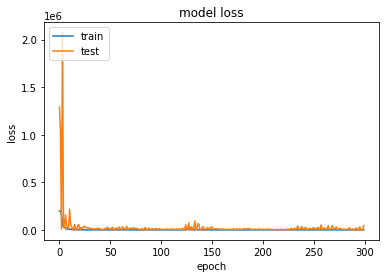



  1%|          | 1/185 [00:16<51:11, 16.69s/it]

[2107.6804]
   Region      Country      5/1/20
0     NaN  Afghanistan  2107.68042
----------------------------------------------------------------------------------------------------
nan Albania 0 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


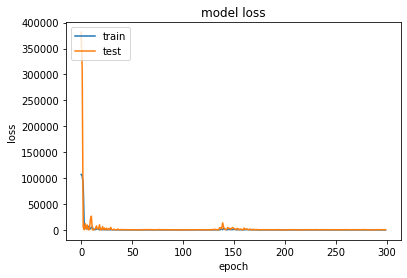



  1%|          | 2/185 [00:33<51:00, 16.72s/it]

[736.6793]
   Region      Country       5/1/20
0     NaN  Afghanistan  2107.680420
1     NaN      Albania   736.679321
----------------------------------------------------------------------------------------------------
nan Algeria 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


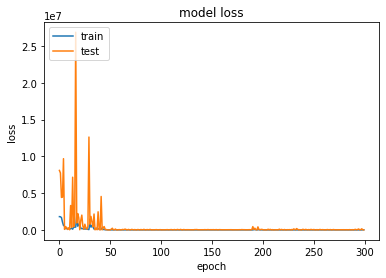



  2%|▏         | 3/185 [00:50<51:08, 16.86s/it]

[3835.5657]
   Region      Country       5/1/20
0     NaN  Afghanistan  2107.680420
1     NaN      Albania   736.679321
2     NaN      Algeria  3835.565674
----------------------------------------------------------------------------------------------------
nan Andorra 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


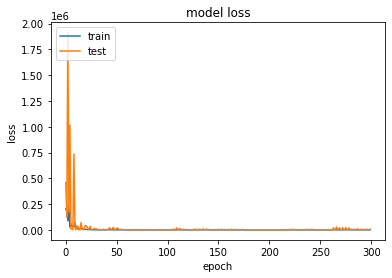



  2%|▏         | 4/185 [01:07<50:53, 16.87s/it]

[888.4797]
   Region      Country       5/1/20
0     NaN  Afghanistan  2107.680420
1     NaN      Albania   736.679321
2     NaN      Algeria  3835.565674
3     NaN      Andorra   888.479675
----------------------------------------------------------------------------------------------------
Angola  has  25  values
----------------------------------------------------------------------------------------------------
Antigua and Barbuda  has  24  values
----------------------------------------------------------------------------------------------------
nan Argentina NE 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


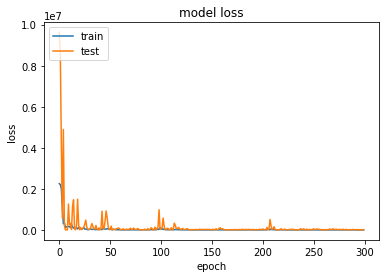



  4%|▍         | 7/185 [01:24<39:57, 13.47s/it]

[4197.9595]
   Region              Country       5/1/20
0     NaN          Afghanistan  2107.680420
1     NaN              Albania   736.679321
2     NaN              Algeria  3835.565674
3     NaN              Andorra   888.479675
4     NaN               Angola     0.000000
5     NaN  Antigua and Barbuda     0.000000
6     NaN            Argentina  4197.959473
----------------------------------------------------------------------------------------------------
nan Armenia 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


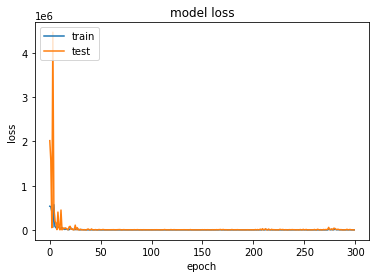



  4%|▍         | 8/185 [01:41<42:58, 14.57s/it]

[1806.5944]
   Region              Country       5/1/20
0     NaN          Afghanistan  2107.680420
1     NaN              Albania   736.679321
2     NaN              Algeria  3835.565674
3     NaN              Andorra   888.479675
4     NaN               Angola     0.000000
5     NaN  Antigua and Barbuda     0.000000
6     NaN            Argentina  4197.959473
7     NaN              Armenia  1806.594360
----------------------------------------------------------------------------------------------------
Australian Capital Territory Australia 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


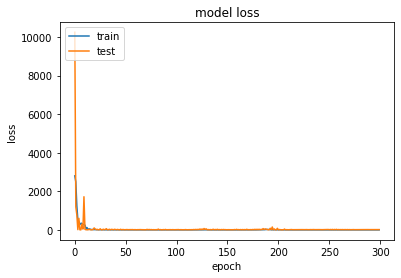

[115.296936]
                         Region              Country       5/1/20
0                           NaN          Afghanistan  2107.680420
1                           NaN              Albania   736.679321
2                           NaN              Algeria  3835.565674
3                           NaN              Andorra   888.479675
4                           NaN               Angola     0.000000
5                           NaN  Antigua and Barbuda     0.000000
6                           NaN            Argentina  4197.959473
7                           NaN              Armenia  1806.594360
8  Australian Capital Territory            Australia   115.296936
----------------------------------------------------------------------------------------------------
New South Wales Australia 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


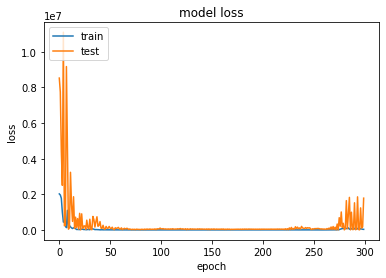

[4638.6963]
                         Region              Country       5/1/20
0                           NaN          Afghanistan  2107.680420
1                           NaN              Albania   736.679321
2                           NaN              Algeria  3835.565674
3                           NaN              Andorra   888.479675
4                           NaN               Angola     0.000000
5                           NaN  Antigua and Barbuda     0.000000
6                           NaN            Argentina  4197.959473
7                           NaN              Armenia  1806.594360
8  Australian Capital Territory            Australia   115.296936
9               New South Wales            Australia  4638.696289
----------------------------------------------------------------------------------------------------
Australia  has  28  values
----------------------------------------------------------------------------------------------------
Queensland Australia 1 1
Loss:  m

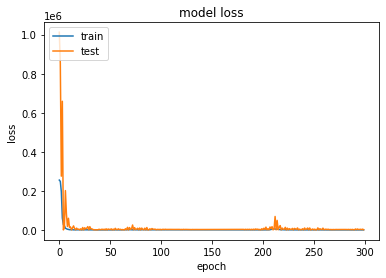

[1118.1816]
                          Region              Country       5/1/20
0                            NaN          Afghanistan  2107.680420
1                            NaN              Albania   736.679321
2                            NaN              Algeria  3835.565674
3                            NaN              Andorra   888.479675
4                            NaN               Angola     0.000000
5                            NaN  Antigua and Barbuda     0.000000
6                            NaN            Argentina  4197.959473
7                            NaN              Armenia  1806.594360
8   Australian Capital Territory            Australia   115.296936
9                New South Wales            Australia  4638.696289
10            Northern Territory            Australia     0.000000
11                    Queensland            Australia  1118.181641
----------------------------------------------------------------------------------------------------
South Australia 

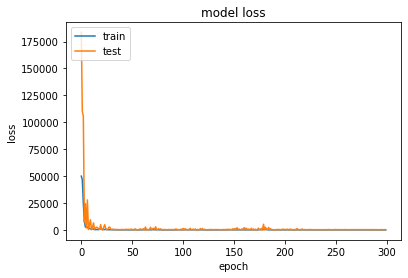

[470.76602]
                          Region              Country       5/1/20
0                            NaN          Afghanistan  2107.680420
1                            NaN              Albania   736.679321
2                            NaN              Algeria  3835.565674
3                            NaN              Andorra   888.479675
4                            NaN               Angola     0.000000
5                            NaN  Antigua and Barbuda     0.000000
6                            NaN            Argentina  4197.959473
7                            NaN              Armenia  1806.594360
8   Australian Capital Territory            Australia   115.296936
9                New South Wales            Australia  4638.696289
10            Northern Territory            Australia     0.000000
11                    Queensland            Australia  1118.181641
12               South Australia            Australia   470.766022
--------------------------------------------------

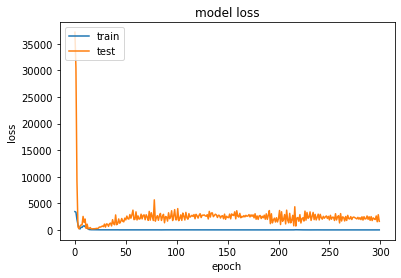

[384.28152]
                          Region              Country       5/1/20
0                            NaN          Afghanistan  2107.680420
1                            NaN              Albania   736.679321
2                            NaN              Algeria  3835.565674
3                            NaN              Andorra   888.479675
4                            NaN               Angola     0.000000
5                            NaN  Antigua and Barbuda     0.000000
6                            NaN            Argentina  4197.959473
7                            NaN              Armenia  1806.594360
8   Australian Capital Territory            Australia   115.296936
9                New South Wales            Australia  4638.696289
10            Northern Territory            Australia     0.000000
11                    Queensland            Australia  1118.181641
12               South Australia            Australia   470.766022
13                      Tasmania            Austra

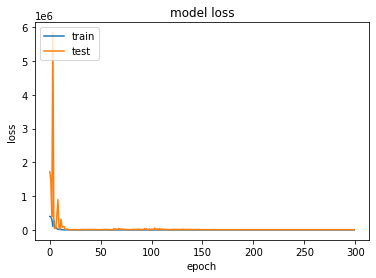

[1525.6538]
                          Region              Country       5/1/20
0                            NaN          Afghanistan  2107.680420
1                            NaN              Albania   736.679321
2                            NaN              Algeria  3835.565674
3                            NaN              Andorra   888.479675
4                            NaN               Angola     0.000000
5                            NaN  Antigua and Barbuda     0.000000
6                            NaN            Argentina  4197.959473
7                            NaN              Armenia  1806.594360
8   Australian Capital Territory            Australia   115.296936
9                New South Wales            Australia  4638.696289
10            Northern Territory            Australia     0.000000
11                    Queensland            Australia  1118.181641
12               South Australia            Australia   470.766022
13                      Tasmania            Austra

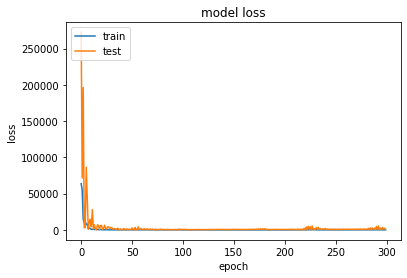



  5%|▍         | 9/185 [03:42<2:16:58, 46.70s/it]

[622.9778]
                          Region              Country       5/1/20
0                            NaN          Afghanistan  2107.680420
1                            NaN              Albania   736.679321
2                            NaN              Algeria  3835.565674
3                            NaN              Andorra   888.479675
4                            NaN               Angola     0.000000
5                            NaN  Antigua and Barbuda     0.000000
6                            NaN            Argentina  4197.959473
7                            NaN              Armenia  1806.594360
8   Australian Capital Territory            Australia   115.296936
9                New South Wales            Australia  4638.696289
10            Northern Territory            Australia     0.000000
11                    Queensland            Australia  1118.181641
12               South Australia            Australia   470.766022
13                      Tasmania            Austral

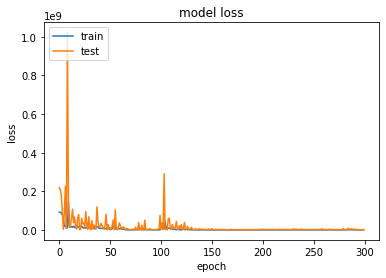



  5%|▌         | 10/185 [04:00<1:50:59, 38.06s/it]

[16857.646]
                          Region              Country        5/1/20
0                            NaN          Afghanistan   2107.680420
1                            NaN              Albania    736.679321
2                            NaN              Algeria   3835.565674
3                            NaN              Andorra    888.479675
4                            NaN               Angola      0.000000
5                            NaN  Antigua and Barbuda      0.000000
6                            NaN            Argentina   4197.959473
7                            NaN              Armenia   1806.594360
8   Australian Capital Territory            Australia    115.296936
9                New South Wales            Australia   4638.696289
10            Northern Territory            Australia      0.000000
11                    Queensland            Australia   1118.181641
12               South Australia            Australia    470.766022
13                      Tasmania    

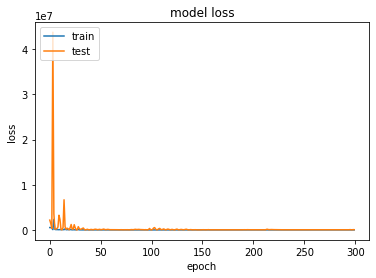



  6%|▌         | 11/185 [04:17<1:31:32, 31.57s/it]

[2327.9048]
                          Region              Country        5/1/20
0                            NaN          Afghanistan   2107.680420
1                            NaN              Albania    736.679321
2                            NaN              Algeria   3835.565674
3                            NaN              Andorra    888.479675
4                            NaN               Angola      0.000000
5                            NaN  Antigua and Barbuda      0.000000
6                            NaN            Argentina   4197.959473
7                            NaN              Armenia   1806.594360
8   Australian Capital Territory            Australia    115.296936
9                New South Wales            Australia   4638.696289
10            Northern Territory            Australia      0.000000
11                    Queensland            Australia   1118.181641
12               South Australia            Australia    470.766022
13                      Tasmania    

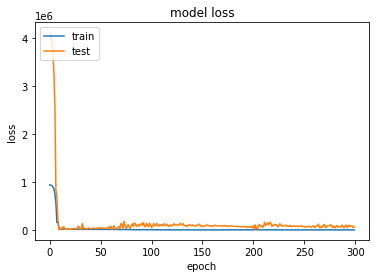



  7%|▋         | 13/185 [04:29<1:08:36, 23.94s/it]

[3947.4558]
                          Region              Country        5/1/20
0                            NaN          Afghanistan   2107.680420
1                            NaN              Albania    736.679321
2                            NaN              Algeria   3835.565674
3                            NaN              Andorra    888.479675
4                            NaN               Angola      0.000000
5                            NaN  Antigua and Barbuda      0.000000
6                            NaN            Argentina   4197.959473
7                            NaN              Armenia   1806.594360
8   Australian Capital Territory            Australia    115.296936
9                New South Wales            Australia   4638.696289
10            Northern Territory            Australia      0.000000
11                    Queensland            Australia   1118.181641
12               South Australia            Australia    470.766022
13                      Tasmania    

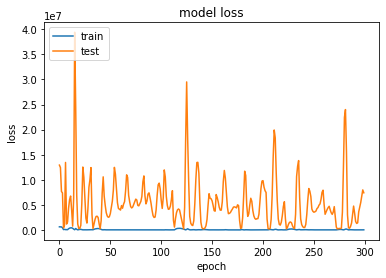



  8%|▊         | 14/185 [04:46<1:02:11, 21.82s/it]

[21391.035]
                          Region              Country        5/1/20
0                            NaN          Afghanistan   2107.680420
1                            NaN              Albania    736.679321
2                            NaN              Algeria   3835.565674
3                            NaN              Andorra    888.479675
4                            NaN               Angola      0.000000
5                            NaN  Antigua and Barbuda      0.000000
6                            NaN            Argentina   4197.959473
7                            NaN              Armenia   1806.594360
8   Australian Capital Territory            Australia    115.296936
9                New South Wales            Australia   4638.696289
10            Northern Territory            Australia      0.000000
11                    Queensland            Australia   1118.181641
12               South Australia            Australia    470.766022
13                      Tasmania    

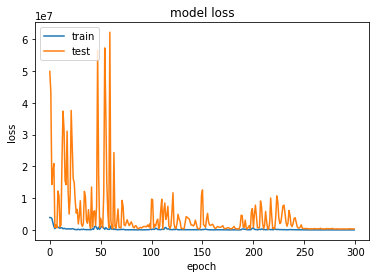



  9%|▊         | 16/185 [05:04<50:50, 18.05s/it]  

[16266.694]
                          Region              Country        5/1/20
0                            NaN          Afghanistan   2107.680420
1                            NaN              Albania    736.679321
2                            NaN              Algeria   3835.565674
3                            NaN              Andorra    888.479675
4                            NaN               Angola      0.000000
5                            NaN  Antigua and Barbuda      0.000000
6                            NaN            Argentina   4197.959473
7                            NaN              Armenia   1806.594360
8   Australian Capital Territory            Australia    115.296936
9                New South Wales            Australia   4638.696289
10            Northern Territory            Australia      0.000000
11                    Queensland            Australia   1118.181641
12               South Australia            Australia    470.766022
13                      Tasmania    

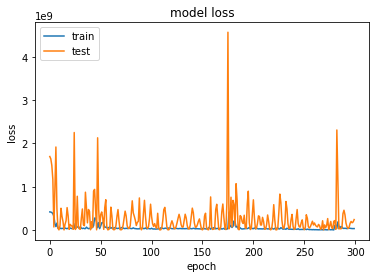



  9%|▉         | 17/185 [05:21<49:18, 17.61s/it]

[76469.35]
                          Region              Country        5/1/20
0                            NaN          Afghanistan   2107.680420
1                            NaN              Albania    736.679321
2                            NaN              Algeria   3835.565674
3                            NaN              Andorra    888.479675
4                            NaN               Angola      0.000000
5                            NaN  Antigua and Barbuda      0.000000
6                            NaN            Argentina   4197.959473
7                            NaN              Armenia   1806.594360
8   Australian Capital Territory            Australia    115.296936
9                New South Wales            Australia   4638.696289
10            Northern Territory            Australia      0.000000
11                    Queensland            Australia   1118.181641
12               South Australia            Australia    470.766022
13                      Tasmania     

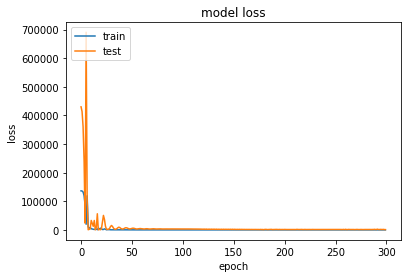



 11%|█▏        | 21/185 [05:33<36:11, 13.24s/it]

[983.19293]
                          Region              Country        5/1/20
0                            NaN          Afghanistan   2107.680420
1                            NaN              Albania    736.679321
2                            NaN              Algeria   3835.565674
3                            NaN              Andorra    888.479675
4                            NaN               Angola      0.000000
5                            NaN  Antigua and Barbuda      0.000000
6                            NaN            Argentina   4197.959473
7                            NaN              Armenia   1806.594360
8   Australian Capital Territory            Australia    115.296936
9                New South Wales            Australia   4638.696289
10            Northern Territory            Australia      0.000000
11                    Queensland            Australia   1118.181641
12               South Australia            Australia    470.766022
13                      Tasmania    

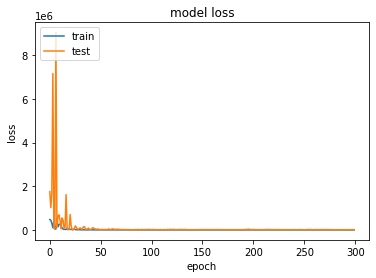



 12%|█▏        | 22/185 [05:50<39:10, 14.42s/it]

[1847.2483]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.7

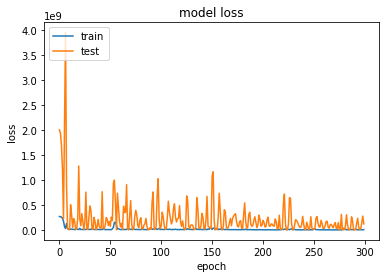



 13%|█▎        | 24/185 [06:07<33:58, 12.66s/it]

[90067.43]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.76

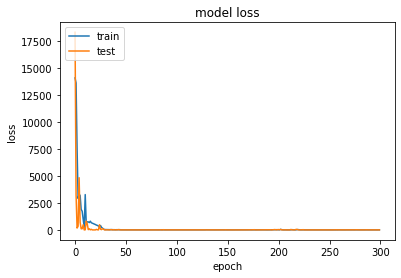



 14%|█▎        | 25/185 [06:25<37:39, 14.12s/it]

[140.14714]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.7

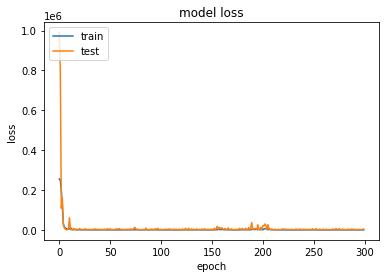



 14%|█▍        | 26/185 [06:41<39:16, 14.82s/it]

[1195.8181]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.7

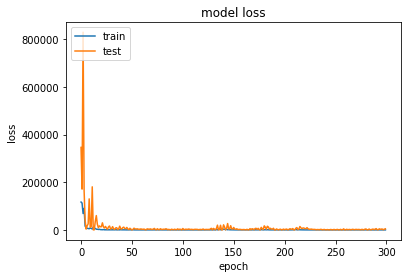



 15%|█▍        | 27/185 [06:59<41:14, 15.66s/it]

[792.0796]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.76

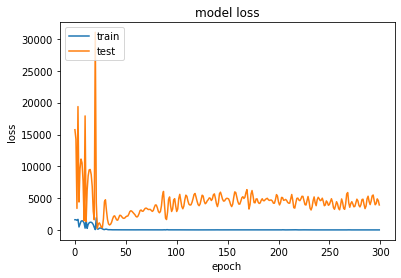



 15%|█▌        | 28/185 [07:16<42:03, 16.07s/it]

[666.44867]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.7

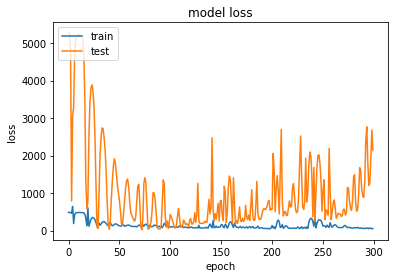



 16%|█▌        | 30/185 [07:33<35:26, 13.72s/it]

[3849.3696]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.7

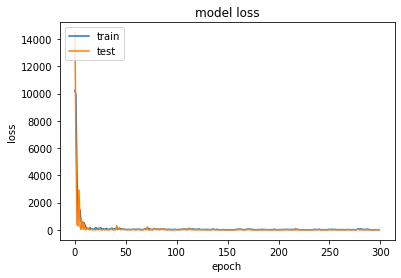



 17%|█▋        | 31/185 [07:50<37:42, 14.69s/it]

[119.530235]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.

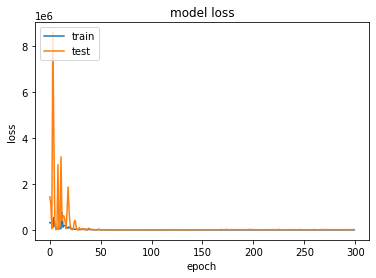



 17%|█▋        | 32/185 [08:07<39:51, 15.63s/it]

[1345.959]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.76

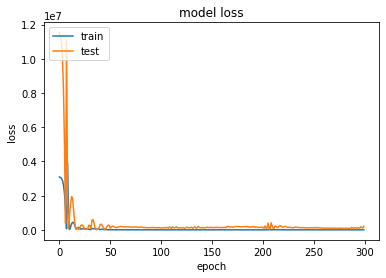

[4143.8584]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.7

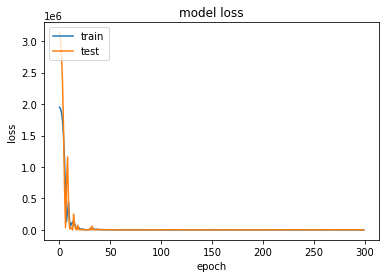

[1959.4435]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.7

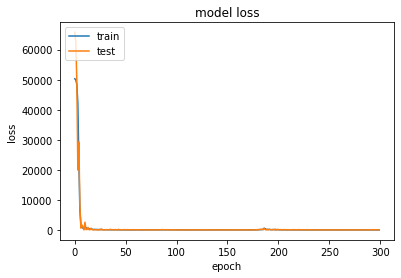

[279.7034]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.76

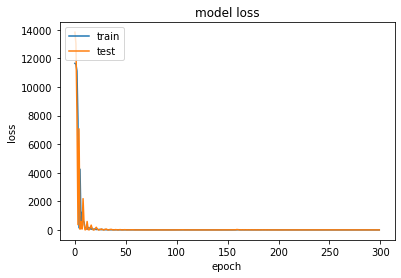

[128.5083]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.76

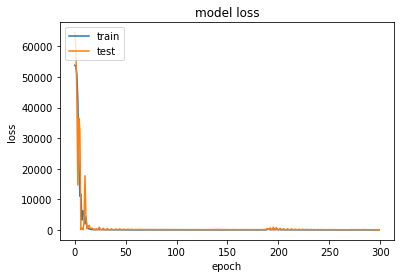

[283.75977]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.7

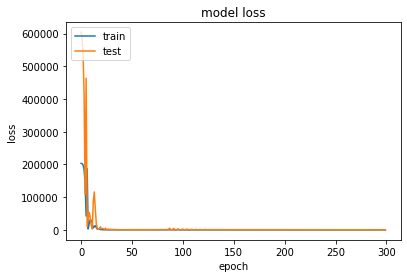

[1089.9374]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.7

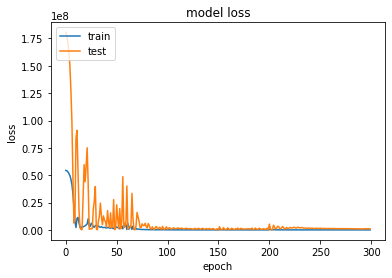

[21994.34]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.76

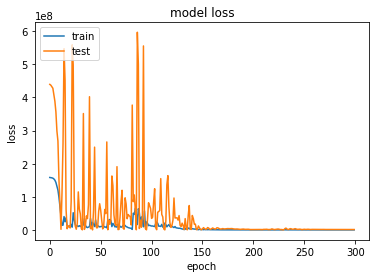

[29558.924]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.7

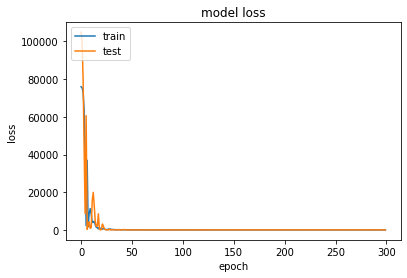



 18%|█▊        | 33/185 [10:01<1:53:44, 44.90s/it]

[350.8822]
                          Region                 Country        5/1/20
0                            NaN             Afghanistan   2107.680420
1                            NaN                 Albania    736.679321
2                            NaN                 Algeria   3835.565674
3                            NaN                 Andorra    888.479675
4                            NaN                  Angola      0.000000
5                            NaN     Antigua and Barbuda      0.000000
6                            NaN               Argentina   4197.959473
7                            NaN                 Armenia   1806.594360
8   Australian Capital Territory               Australia    115.296936
9                New South Wales               Australia   4638.696289
10            Northern Territory               Australia      0.000000
11                    Queensland               Australia   1118.181641
12               South Australia               Australia    470.76

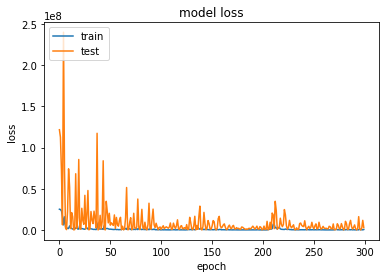



 19%|█▉        | 36/185 [10:17<1:22:11, 33.10s/it]

[17548.504]
                          Region                   Country        5/1/20
0                            NaN               Afghanistan   2107.680420
1                            NaN                   Albania    736.679321
2                            NaN                   Algeria   3835.565674
3                            NaN                   Andorra    888.479675
4                            NaN                    Angola      0.000000
5                            NaN       Antigua and Barbuda      0.000000
6                            NaN                 Argentina   4197.959473
7                            NaN                   Armenia   1806.594360
8   Australian Capital Territory                 Australia    115.296936
9                New South Wales                 Australia   4638.696289
10            Northern Territory                 Australia      0.000000
11                    Queensland                 Australia   1118.181641
12               South Australia       

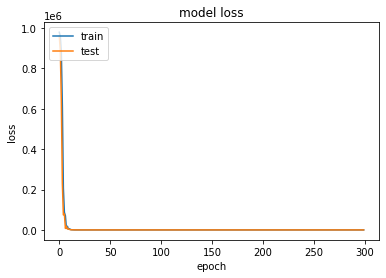

[990.6937]
                          Region                   Country        5/1/20
0                            NaN               Afghanistan   2107.680420
1                            NaN                   Albania    736.679321
2                            NaN                   Algeria   3835.565674
3                            NaN                   Andorra    888.479675
4                            NaN                    Angola      0.000000
5                            NaN       Antigua and Barbuda      0.000000
6                            NaN                 Argentina   4197.959473
7                            NaN                   Armenia   1806.594360
8   Australian Capital Territory                 Australia    115.296936
9                New South Wales                 Australia   4638.696289
10            Northern Territory                 Australia      0.000000
11                    Queensland                 Australia   1118.181641
12               South Australia        

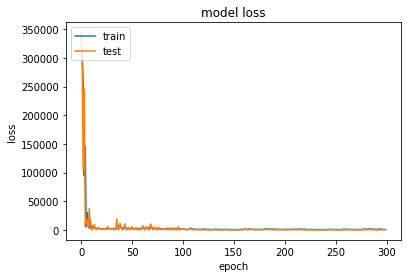

[582.31036]
                          Region                   Country        5/1/20
0                            NaN               Afghanistan   2107.680420
1                            NaN                   Albania    736.679321
2                            NaN                   Algeria   3835.565674
3                            NaN                   Andorra    888.479675
4                            NaN                    Angola      0.000000
5                            NaN       Antigua and Barbuda      0.000000
6                            NaN                 Argentina   4197.959473
7                            NaN                   Armenia   1806.594360
8   Australian Capital Territory                 Australia    115.296936
9                New South Wales                 Australia   4638.696289
10            Northern Territory                 Australia      0.000000
11                    Queensland                 Australia   1118.181641
12               South Australia       

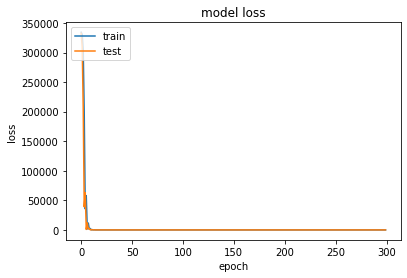

[580.7258]
                          Region                   Country        5/1/20
0                            NaN               Afghanistan   2107.680420
1                            NaN                   Albania    736.679321
2                            NaN                   Algeria   3835.565674
3                            NaN                   Andorra    888.479675
4                            NaN                    Angola      0.000000
5                            NaN       Antigua and Barbuda      0.000000
6                            NaN                 Argentina   4197.959473
7                            NaN                   Armenia   1806.594360
8   Australian Capital Territory                 Australia    115.296936
9                New South Wales                 Australia   4638.696289
10            Northern Territory                 Australia      0.000000
11                    Queensland                 Australia   1118.181641
12               South Australia        

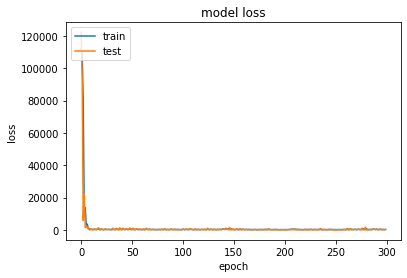

[373.08112]
       Region      Country        5/1/20
0         NaN  Afghanistan   2107.680420
1         NaN      Albania    736.679321
2         NaN      Algeria   3835.565674
3         NaN      Andorra    888.479675
4         NaN       Angola      0.000000
..        ...          ...           ...
56        NaN        Chile  17548.503906
57      Anhui        China    990.693726
58    Beijing        China    582.310364
59  Chongqing        China    580.725830
60     Fujian        China    373.081116

[61 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Gansu China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


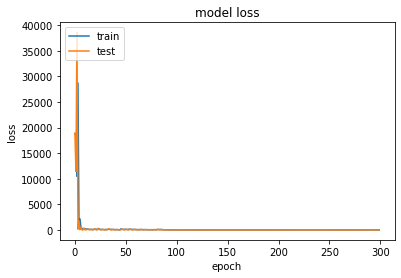

[140.87823]
       Region      Country       5/1/20
0         NaN  Afghanistan  2107.680420
1         NaN      Albania   736.679321
2         NaN      Algeria  3835.565674
3         NaN      Andorra   888.479675
4         NaN       Angola     0.000000
..        ...          ...          ...
57      Anhui        China   990.693726
58    Beijing        China   582.310364
59  Chongqing        China   580.725830
60     Fujian        China   373.081116
61      Gansu        China   140.878235

[62 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Guangdong China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


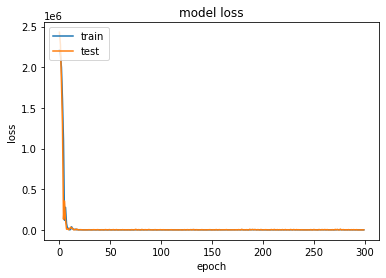

[1643.6401]
       Region      Country       5/1/20
0         NaN  Afghanistan  2107.680420
1         NaN      Albania   736.679321
2         NaN      Algeria  3835.565674
3         NaN      Andorra   888.479675
4         NaN       Angola     0.000000
..        ...          ...          ...
58    Beijing        China   582.310364
59  Chongqing        China   580.725830
60     Fujian        China   373.081116
61      Gansu        China   140.878235
62  Guangdong        China  1643.640137

[63 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Guangxi China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


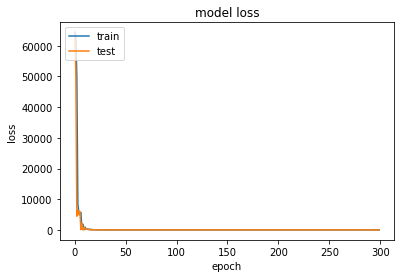

[253.87209]
       Region      Country       5/1/20
0         NaN  Afghanistan  2107.680420
1         NaN      Albania   736.679321
2         NaN      Algeria  3835.565674
3         NaN      Andorra   888.479675
4         NaN       Angola     0.000000
..        ...          ...          ...
59  Chongqing        China   580.725830
60     Fujian        China   373.081116
61      Gansu        China   140.878235
62  Guangdong        China  1643.640137
63    Guangxi        China   253.872086

[64 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Guizhou China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


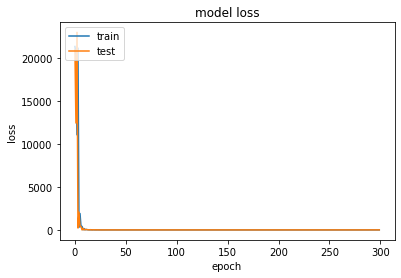

[144.94945]
       Region      Country       5/1/20
0         NaN  Afghanistan  2107.680420
1         NaN      Albania   736.679321
2         NaN      Algeria  3835.565674
3         NaN      Andorra   888.479675
4         NaN       Angola     0.000000
..        ...          ...          ...
60     Fujian        China   373.081116
61      Gansu        China   140.878235
62  Guangdong        China  1643.640137
63    Guangxi        China   253.872086
64    Guizhou        China   144.949448

[65 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Hainan China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


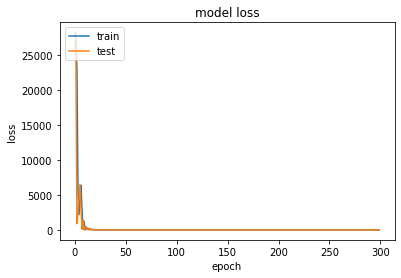

[168.]
       Region      Country       5/1/20
0         NaN  Afghanistan  2107.680420
1         NaN      Albania   736.679321
2         NaN      Algeria  3835.565674
3         NaN      Andorra   888.479675
4         NaN       Angola     0.000000
..        ...          ...          ...
61      Gansu        China   140.878235
62  Guangdong        China  1643.640137
63    Guangxi        China   253.872086
64    Guizhou        China   144.949448
65     Hainan        China   168.000000

[66 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Hebei China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


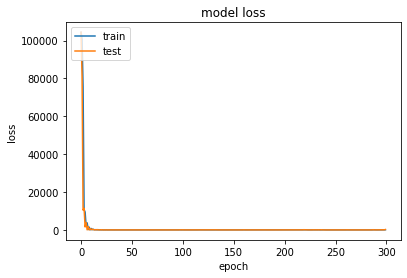

[342.78592]
       Region      Country       5/1/20
0         NaN  Afghanistan  2107.680420
1         NaN      Albania   736.679321
2         NaN      Algeria  3835.565674
3         NaN      Andorra   888.479675
4         NaN       Angola     0.000000
..        ...          ...          ...
62  Guangdong        China  1643.640137
63    Guangxi        China   253.872086
64    Guizhou        China   144.949448
65     Hainan        China   168.000000
66      Hebei        China   342.785919

[67 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Heilongjiang China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


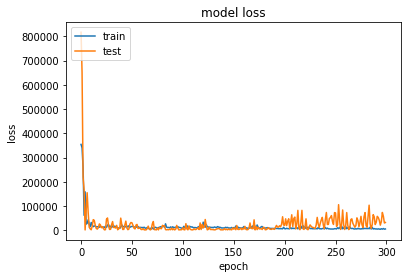

[1046.3907]
          Region      Country       5/1/20
0            NaN  Afghanistan  2107.680420
1            NaN      Albania   736.679321
2            NaN      Algeria  3835.565674
3            NaN      Andorra   888.479675
4            NaN       Angola     0.000000
..           ...          ...          ...
63       Guangxi        China   253.872086
64       Guizhou        China   144.949448
65        Hainan        China   168.000000
66         Hebei        China   342.785919
67  Heilongjiang        China  1046.390747

[68 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Henan China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


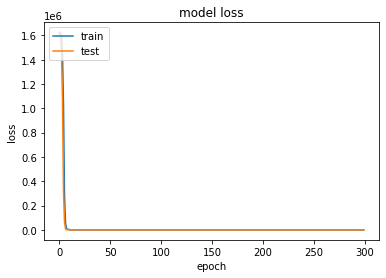

[1274.5825]
          Region      Country       5/1/20
0            NaN  Afghanistan  2107.680420
1            NaN      Albania   736.679321
2            NaN      Algeria  3835.565674
3            NaN      Andorra   888.479675
4            NaN       Angola     0.000000
..           ...          ...          ...
64       Guizhou        China   144.949448
65        Hainan        China   168.000000
66         Hebei        China   342.785919
67  Heilongjiang        China  1046.390747
68         Henan        China  1274.582520

[69 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Hong Kong China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


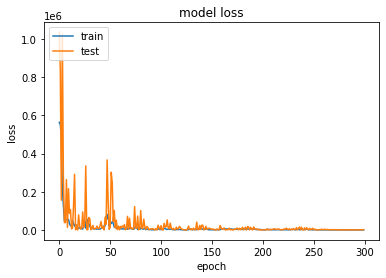

[1084.3461]
          Region      Country       5/1/20
0            NaN  Afghanistan  2107.680420
1            NaN      Albania   736.679321
2            NaN      Algeria  3835.565674
3            NaN      Andorra   888.479675
4            NaN       Angola     0.000000
..           ...          ...          ...
65        Hainan        China   168.000000
66         Hebei        China   342.785919
67  Heilongjiang        China  1046.390747
68         Henan        China  1274.582520
69     Hong Kong        China  1084.346069

[70 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Hubei China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


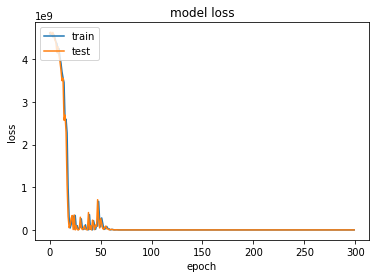

[67946.39]
          Region      Country        5/1/20
0            NaN  Afghanistan   2107.680420
1            NaN      Albania    736.679321
2            NaN      Algeria   3835.565674
3            NaN      Andorra    888.479675
4            NaN       Angola      0.000000
..           ...          ...           ...
66         Hebei        China    342.785919
67  Heilongjiang        China   1046.390747
68         Henan        China   1274.582520
69     Hong Kong        China   1084.346069
70         Hubei        China  67946.390625

[71 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Hunan China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


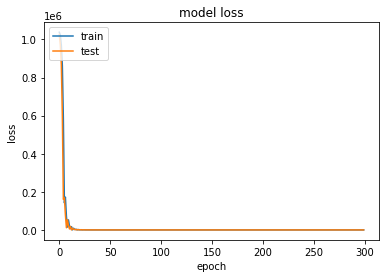

[1018.38916]
          Region      Country        5/1/20
0            NaN  Afghanistan   2107.680420
1            NaN      Albania    736.679321
2            NaN      Algeria   3835.565674
3            NaN      Andorra    888.479675
4            NaN       Angola      0.000000
..           ...          ...           ...
67  Heilongjiang        China   1046.390747
68         Henan        China   1274.582520
69     Hong Kong        China   1084.346069
70         Hubei        China  67946.390625
71         Hunan        China   1018.389160

[72 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Inner Mongolia China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


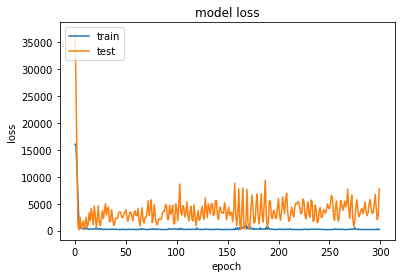

[371.02856]
            Region      Country        5/1/20
0              NaN  Afghanistan   2107.680420
1              NaN      Albania    736.679321
2              NaN      Algeria   3835.565674
3              NaN      Andorra    888.479675
4              NaN       Angola      0.000000
..             ...          ...           ...
68           Henan        China   1274.582520
69       Hong Kong        China   1084.346069
70           Hubei        China  67946.390625
71           Hunan        China   1018.389160
72  Inner Mongolia        China    371.028564

[73 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Jiangsu China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


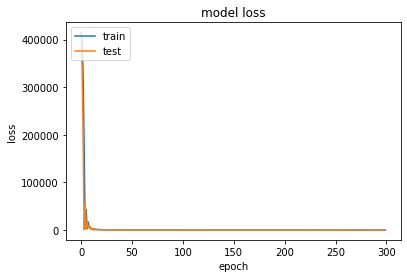

[666.01166]
            Region      Country        5/1/20
0              NaN  Afghanistan   2107.680420
1              NaN      Albania    736.679321
2              NaN      Algeria   3835.565674
3              NaN      Andorra    888.479675
4              NaN       Angola      0.000000
..             ...          ...           ...
69       Hong Kong        China   1084.346069
70           Hubei        China  67946.390625
71           Hunan        China   1018.389160
72  Inner Mongolia        China    371.028564
73         Jiangsu        China    666.011658

[74 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Jiangxi China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


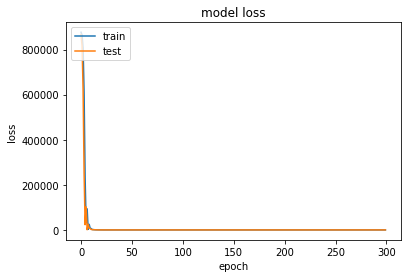

[938.86237]
            Region      Country        5/1/20
0              NaN  Afghanistan   2107.680420
1              NaN      Albania    736.679321
2              NaN      Algeria   3835.565674
3              NaN      Andorra    888.479675
4              NaN       Angola      0.000000
..             ...          ...           ...
70           Hubei        China  67946.390625
71           Hunan        China   1018.389160
72  Inner Mongolia        China    371.028564
73         Jiangsu        China    666.011658
74         Jiangxi        China    938.862366

[75 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Jilin China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


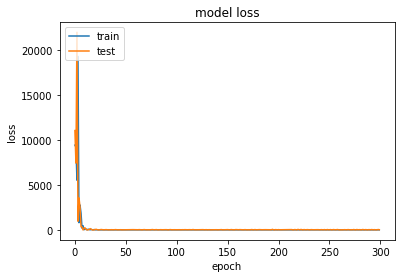

[105.47647]
            Region      Country       5/1/20
0              NaN  Afghanistan  2107.680420
1              NaN      Albania   736.679321
2              NaN      Algeria  3835.565674
3              NaN      Andorra   888.479675
4              NaN       Angola     0.000000
..             ...          ...          ...
71           Hunan        China  1018.389160
72  Inner Mongolia        China   371.028564
73         Jiangsu        China   666.011658
74         Jiangxi        China   938.862366
75           Jilin        China   105.476471

[76 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Liaoning China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


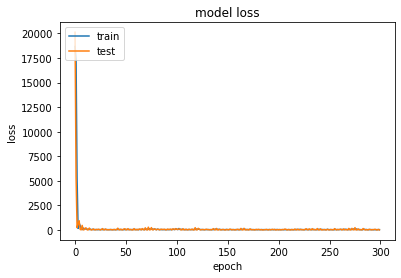

[146.0633]
            Region      Country       5/1/20
0              NaN  Afghanistan  2107.680420
1              NaN      Albania   736.679321
2              NaN      Algeria  3835.565674
3              NaN      Andorra   888.479675
4              NaN       Angola     0.000000
..             ...          ...          ...
72  Inner Mongolia        China   371.028564
73         Jiangsu        China   666.011658
74         Jiangxi        China   938.862366
75           Jilin        China   105.476471
76        Liaoning        China   146.063293

[77 rows x 3 columns]
----------------------------------------------------------------------------------------------------
China  has  45  values
----------------------------------------------------------------------------------------------------
China  has  75  values
----------------------------------------------------------------------------------------------------
China  has  18  values
------------------------------------------------------

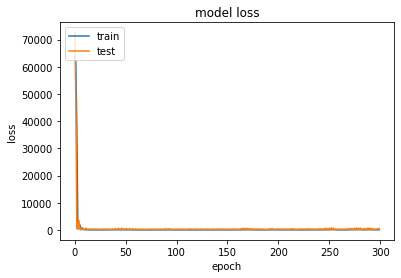

[251.86255]
      Region      Country       5/1/20
0        NaN  Afghanistan  2107.680420
1        NaN      Albania   736.679321
2        NaN      Algeria  3835.565674
3        NaN      Andorra   888.479675
4        NaN       Angola     0.000000
..       ...          ...          ...
76  Liaoning        China   146.063293
77     Macau        China     0.000000
78   Ningxia        China     0.000000
79   Qinghai        China     0.000000
80   Shaanxi        China   251.862549

[81 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Shandong China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


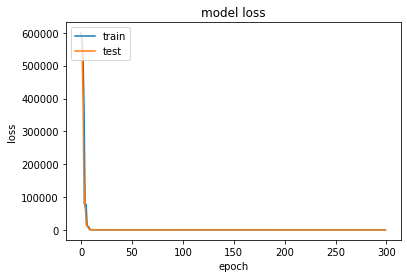

[793.0332]
      Region      Country       5/1/20
0        NaN  Afghanistan  2107.680420
1        NaN      Albania   736.679321
2        NaN      Algeria  3835.565674
3        NaN      Andorra   888.479675
4        NaN       Angola     0.000000
..       ...          ...          ...
77     Macau        China     0.000000
78   Ningxia        China     0.000000
79   Qinghai        China     0.000000
80   Shaanxi        China   251.862549
81  Shandong        China   793.033203

[82 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Shanghai China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


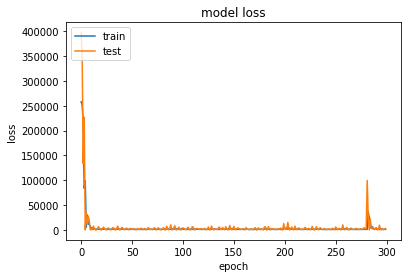

[760.045]
      Region      Country       5/1/20
0        NaN  Afghanistan  2107.680420
1        NaN      Albania   736.679321
2        NaN      Algeria  3835.565674
3        NaN      Andorra   888.479675
4        NaN       Angola     0.000000
..       ...          ...          ...
78   Ningxia        China     0.000000
79   Qinghai        China     0.000000
80   Shaanxi        China   251.862549
81  Shandong        China   793.033203
82  Shanghai        China   760.044983

[83 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Shanxi China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


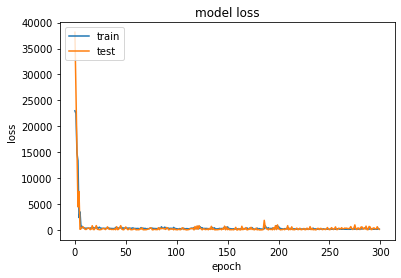

[211.97647]
      Region      Country       5/1/20
0        NaN  Afghanistan  2107.680420
1        NaN      Albania   736.679321
2        NaN      Algeria  3835.565674
3        NaN      Andorra   888.479675
4        NaN       Angola     0.000000
..       ...          ...          ...
79   Qinghai        China     0.000000
80   Shaanxi        China   251.862549
81  Shandong        China   793.033203
82  Shanghai        China   760.044983
83    Shanxi        China   211.976471

[84 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Sichuan China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


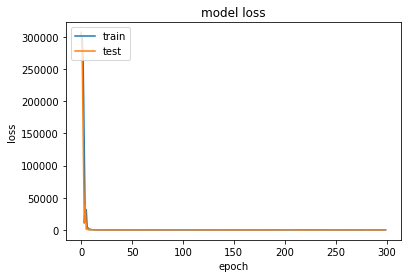

[575.06396]
      Region      Country       5/1/20
0        NaN  Afghanistan  2107.680420
1        NaN      Albania   736.679321
2        NaN      Algeria  3835.565674
3        NaN      Andorra   888.479675
4        NaN       Angola     0.000000
..       ...          ...          ...
80   Shaanxi        China   251.862549
81  Shandong        China   793.033203
82  Shanghai        China   760.044983
83    Shanxi        China   211.976471
84   Sichuan        China   575.063965

[85 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Tianjin China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


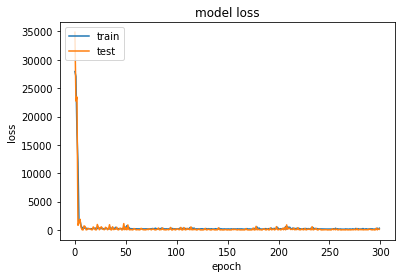

[203.69243]
      Region      Country       5/1/20
0        NaN  Afghanistan  2107.680420
1        NaN      Albania   736.679321
2        NaN      Algeria  3835.565674
3        NaN      Andorra   888.479675
4        NaN       Angola     0.000000
..       ...          ...          ...
81  Shandong        China   793.033203
82  Shanghai        China   760.044983
83    Shanxi        China   211.976471
84   Sichuan        China   575.063965
85   Tianjin        China   203.692429

[86 rows x 3 columns]
----------------------------------------------------------------------------------------------------
China  has  1  values
----------------------------------------------------------------------------------------------------
China  has  76  values
----------------------------------------------------------------------------------------------------
Yunnan China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


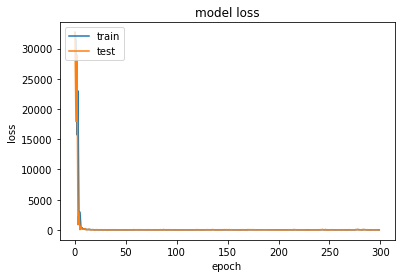

[186.34908]
      Region      Country       5/1/20
0        NaN  Afghanistan  2107.680420
1        NaN      Albania   736.679321
2        NaN      Algeria  3835.565674
3        NaN      Andorra   888.479675
4        NaN       Angola     0.000000
..       ...          ...          ...
84   Sichuan        China   575.063965
85   Tianjin        China   203.692429
86     Tibet        China     0.000000
87  Xinjiang        China     0.000000
88    Yunnan        China   186.349075

[89 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Zhejiang China 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


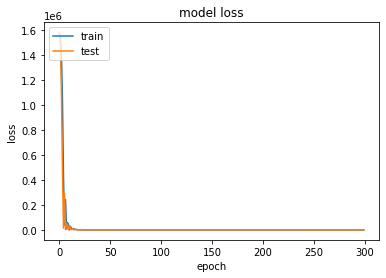



 20%|██        | 37/185 [18:13<6:49:16, 165.93s/it]

[1285.0675]
      Region      Country       5/1/20
0        NaN  Afghanistan  2107.680420
1        NaN      Albania   736.679321
2        NaN      Algeria  3835.565674
3        NaN      Andorra   888.479675
4        NaN       Angola     0.000000
..       ...          ...          ...
85   Tianjin        China   203.692429
86     Tibet        China     0.000000
87  Xinjiang        China     0.000000
88    Yunnan        China   186.349075
89  Zhejiang        China  1285.067505

[90 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Colombia 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


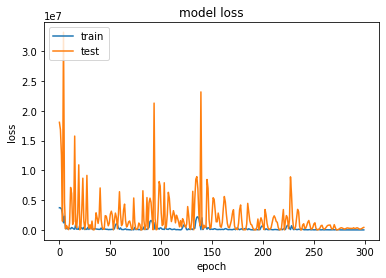



 21%|██        | 38/185 [18:30<4:56:50, 121.16s/it]

[6708.6665]
      Region      Country       5/1/20
0        NaN  Afghanistan  2107.680420
1        NaN      Albania   736.679321
2        NaN      Algeria  3835.565674
3        NaN      Andorra   888.479675
4        NaN       Angola     0.000000
..       ...          ...          ...
86     Tibet        China     0.000000
87  Xinjiang        China     0.000000
88    Yunnan        China   186.349075
89  Zhejiang        China  1285.067505
90       NaN     Colombia  6708.666504

[91 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Congo (Brazzaville) 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


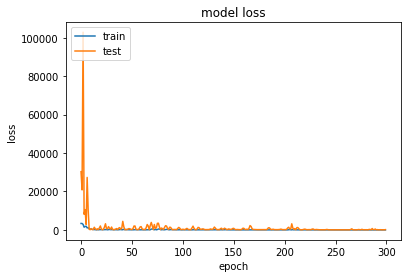



 21%|██        | 39/185 [18:46<3:38:22, 89.74s/it] 

[397.49347]
      Region              Country       5/1/20
0        NaN          Afghanistan  2107.680420
1        NaN              Albania   736.679321
2        NaN              Algeria  3835.565674
3        NaN              Andorra   888.479675
4        NaN               Angola     0.000000
..       ...                  ...          ...
87  Xinjiang                China     0.000000
88    Yunnan                China   186.349075
89  Zhejiang                China  1285.067505
90       NaN             Colombia  6708.666504
91       NaN  Congo (Brazzaville)   397.493469

[92 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Congo (Kinshasa) 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


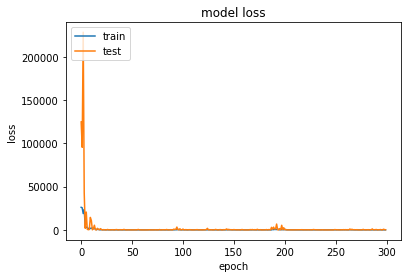



 22%|██▏       | 40/185 [19:04<2:44:26, 68.05s/it]

[465.0369]
      Region              Country       5/1/20
0        NaN          Afghanistan  2107.680420
1        NaN              Albania   736.679321
2        NaN              Algeria  3835.565674
3        NaN              Andorra   888.479675
4        NaN               Angola     0.000000
..       ...                  ...          ...
88    Yunnan                China   186.349075
89  Zhejiang                China  1285.067505
90       NaN             Colombia  6708.666504
91       NaN  Congo (Brazzaville)   397.493469
92       NaN     Congo (Kinshasa)   465.036896

[93 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Costa Rica 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


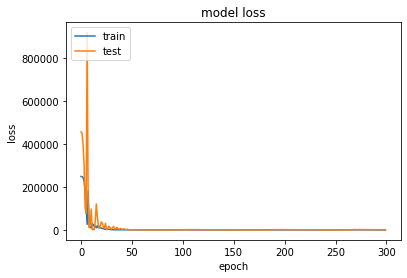



 22%|██▏       | 41/185 [19:16<2:03:08, 51.31s/it]

[786.4158]
      Region              Country       5/1/20
0        NaN          Afghanistan  2107.680420
1        NaN              Albania   736.679321
2        NaN              Algeria  3835.565674
3        NaN              Andorra   888.479675
4        NaN               Angola     0.000000
..       ...                  ...          ...
89  Zhejiang                China  1285.067505
90       NaN             Colombia  6708.666504
91       NaN  Congo (Brazzaville)   397.493469
92       NaN     Congo (Kinshasa)   465.036896
93       NaN           Costa Rica   786.415771

[94 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Cote d'Ivoire 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


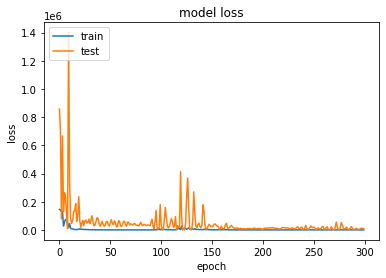



 23%|██▎       | 42/185 [19:34<1:38:34, 41.36s/it]

[1454.6978]
   Region              Country       5/1/20
0     NaN          Afghanistan  2107.680420
1     NaN              Albania   736.679321
2     NaN              Algeria  3835.565674
3     NaN              Andorra   888.479675
4     NaN               Angola     0.000000
..    ...                  ...          ...
90    NaN             Colombia  6708.666504
91    NaN  Congo (Brazzaville)   397.493469
92    NaN     Congo (Kinshasa)   465.036896
93    NaN           Costa Rica   786.415771
94    NaN        Cote d'Ivoire  1454.697754

[95 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Croatia 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


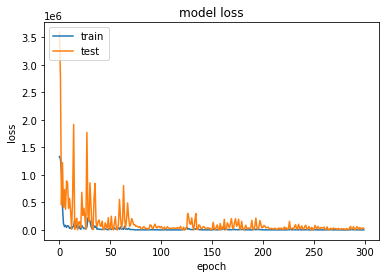



 23%|██▎       | 43/185 [19:51<1:20:47, 34.14s/it]

[2453.2126]
   Region              Country       5/1/20
0     NaN          Afghanistan  2107.680420
1     NaN              Albania   736.679321
2     NaN              Algeria  3835.565674
3     NaN              Andorra   888.479675
4     NaN               Angola     0.000000
..    ...                  ...          ...
91    NaN  Congo (Brazzaville)   397.493469
92    NaN     Congo (Kinshasa)   465.036896
93    NaN           Costa Rica   786.415771
94    NaN        Cote d'Ivoire  1454.697754
95    NaN              Croatia  2453.212646

[96 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Cuba 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


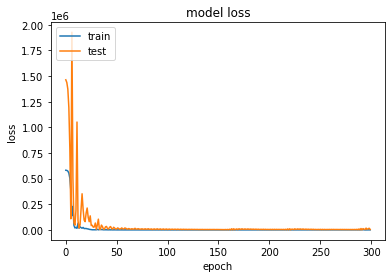



 24%|██▍       | 44/185 [20:04<1:05:15, 27.77s/it]

[1812.2822]
   Region           Country       5/1/20
0     NaN       Afghanistan  2107.680420
1     NaN           Albania   736.679321
2     NaN           Algeria  3835.565674
3     NaN           Andorra   888.479675
4     NaN            Angola     0.000000
..    ...               ...          ...
92    NaN  Congo (Kinshasa)   465.036896
93    NaN        Costa Rica   786.415771
94    NaN     Cote d'Ivoire  1454.697754
95    NaN           Croatia  2453.212646
96    NaN              Cuba  1812.282227

[97 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Cyprus 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


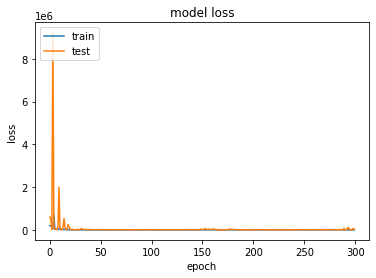



 24%|██▍       | 45/185 [20:21<56:58, 24.42s/it]  

[1214.489]
   Region        Country       5/1/20
0     NaN    Afghanistan  2107.680420
1     NaN        Albania   736.679321
2     NaN        Algeria  3835.565674
3     NaN        Andorra   888.479675
4     NaN         Angola     0.000000
..    ...            ...          ...
93    NaN     Costa Rica   786.415771
94    NaN  Cote d'Ivoire  1454.697754
95    NaN        Croatia  2453.212646
96    NaN           Cuba  1812.282227
97    NaN         Cyprus  1214.489014

[98 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Czechia 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


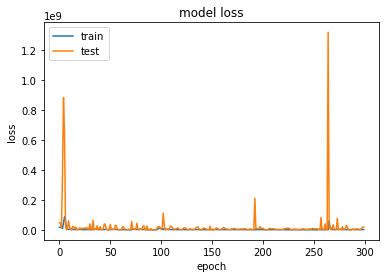



 25%|██▍       | 46/185 [20:37<51:07, 22.07s/it]

[13016.328]
   Region        Country        5/1/20
0     NaN    Afghanistan   2107.680420
1     NaN        Albania    736.679321
2     NaN        Algeria   3835.565674
3     NaN        Andorra    888.479675
4     NaN         Angola      0.000000
..    ...            ...           ...
94    NaN  Cote d'Ivoire   1454.697754
95    NaN        Croatia   2453.212646
96    NaN           Cuba   1812.282227
97    NaN         Cyprus   1214.489014
98    NaN        Czechia  13016.328125

[99 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Faroe Islands Denmark 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


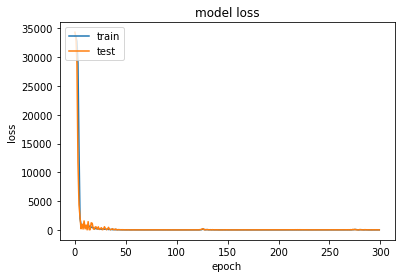

[185.62663]
           Region      Country        5/1/20
0             NaN  Afghanistan   2107.680420
1             NaN      Albania    736.679321
2             NaN      Algeria   3835.565674
3             NaN      Andorra    888.479675
4             NaN       Angola      0.000000
..            ...          ...           ...
95            NaN      Croatia   2453.212646
96            NaN         Cuba   1812.282227
97            NaN       Cyprus   1214.489014
98            NaN      Czechia  13016.328125
99  Faroe Islands      Denmark    185.626633

[100 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Denmark  has  11  values
----------------------------------------------------------------------------------------------------
nan Denmark 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


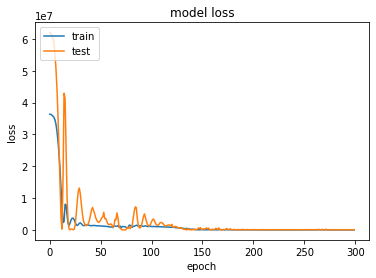



 25%|██▌       | 47/185 [21:03<53:15, 23.16s/it]

[8702.682]
            Region      Country        5/1/20
0              NaN  Afghanistan   2107.680420
1              NaN      Albania    736.679321
2              NaN      Algeria   3835.565674
3              NaN      Andorra    888.479675
4              NaN       Angola      0.000000
..             ...          ...           ...
97             NaN       Cyprus   1214.489014
98             NaN      Czechia  13016.328125
99   Faroe Islands      Denmark    185.626633
100      Greenland      Denmark      0.000000
101            NaN      Denmark   8702.681641

[102 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Diamond Princess 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


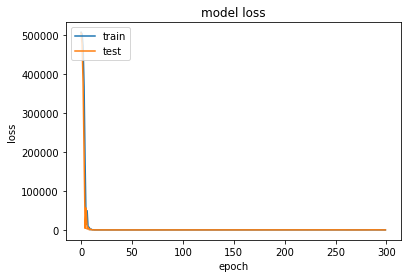



 26%|██▌       | 48/185 [21:19<48:13, 21.12s/it]

[714.541]
            Region           Country        5/1/20
0              NaN       Afghanistan   2107.680420
1              NaN           Albania    736.679321
2              NaN           Algeria   3835.565674
3              NaN           Andorra    888.479675
4              NaN            Angola      0.000000
..             ...               ...           ...
98             NaN           Czechia  13016.328125
99   Faroe Islands           Denmark    185.626633
100      Greenland           Denmark      0.000000
101            NaN           Denmark   8702.681641
102            NaN  Diamond Princess    714.541016

[103 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Djibouti 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


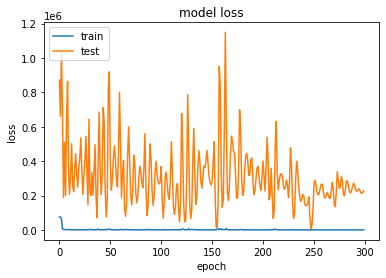



 26%|██▋       | 49/185 [21:36<44:56, 19.82s/it]

[4123.4424]
            Region           Country       5/1/20
0              NaN       Afghanistan  2107.680420
1              NaN           Albania   736.679321
2              NaN           Algeria  3835.565674
3              NaN           Andorra   888.479675
4              NaN            Angola     0.000000
..             ...               ...          ...
99   Faroe Islands           Denmark   185.626633
100      Greenland           Denmark     0.000000
101            NaN           Denmark  8702.681641
102            NaN  Diamond Princess   714.541016
103            NaN          Djibouti  4123.442383

[104 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Dominica  has  16  values
----------------------------------------------------------------------------------------------------
nan Dominican Republic 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


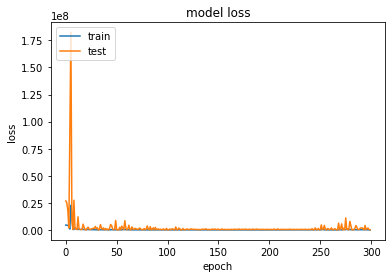



 28%|██▊       | 51/185 [21:53<36:37, 16.40s/it]

[8506.632]
    Region             Country       5/1/20
0      NaN         Afghanistan  2107.680420
1      NaN             Albania   736.679321
2      NaN             Algeria  3835.565674
3      NaN             Andorra   888.479675
4      NaN              Angola     0.000000
..     ...                 ...          ...
101    NaN             Denmark  8702.681641
102    NaN    Diamond Princess   714.541016
103    NaN            Djibouti  4123.442383
104    NaN            Dominica     0.000000
105    NaN  Dominican Republic  8506.631836

[106 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Ecuador 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


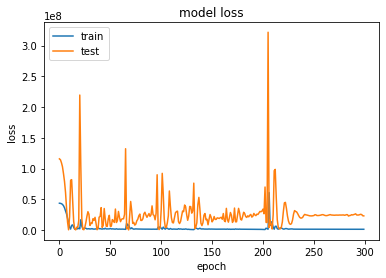



 28%|██▊       | 52/185 [22:06<34:03, 15.37s/it]

[20959.164]
    Region             Country        5/1/20
0      NaN         Afghanistan   2107.680420
1      NaN             Albania    736.679321
2      NaN             Algeria   3835.565674
3      NaN             Andorra    888.479675
4      NaN              Angola      0.000000
..     ...                 ...           ...
102    NaN    Diamond Princess    714.541016
103    NaN            Djibouti   4123.442383
104    NaN            Dominica      0.000000
105    NaN  Dominican Republic   8506.631836
106    NaN             Ecuador  20959.164062

[107 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Egypt 0 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


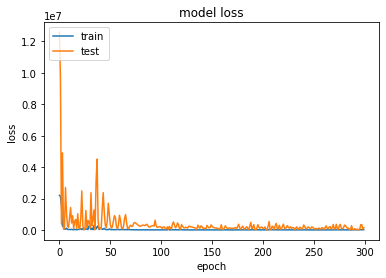



 29%|██▊       | 53/185 [22:23<34:44, 15.79s/it]

[5931.722]
    Region             Country        5/1/20
0      NaN         Afghanistan   2107.680420
1      NaN             Albania    736.679321
2      NaN             Algeria   3835.565674
3      NaN             Andorra    888.479675
4      NaN              Angola      0.000000
..     ...                 ...           ...
103    NaN            Djibouti   4123.442383
104    NaN            Dominica      0.000000
105    NaN  Dominican Republic   8506.631836
106    NaN             Ecuador  20959.164062
107    NaN               Egypt   5931.722168

[108 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan El Salvador NE 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


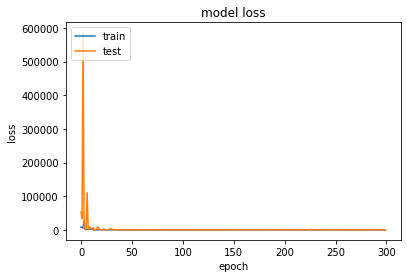



 29%|██▉       | 54/185 [22:42<36:35, 16.76s/it]

[355.65842]
    Region             Country        5/1/20
0      NaN         Afghanistan   2107.680420
1      NaN             Albania    736.679321
2      NaN             Algeria   3835.565674
3      NaN             Andorra    888.479675
4      NaN              Angola      0.000000
..     ...                 ...           ...
104    NaN            Dominica      0.000000
105    NaN  Dominican Republic   8506.631836
106    NaN             Ecuador  20959.164062
107    NaN               Egypt   5931.722168
108    NaN         El Salvador    355.658417

[109 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Equatorial Guinea 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


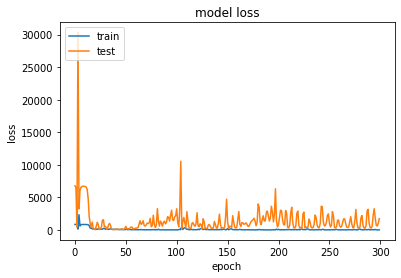



 30%|██▉       | 55/185 [22:59<36:50, 17.01s/it]

[981.91956]
    Region             Country        5/1/20
0      NaN         Afghanistan   2107.680420
1      NaN             Albania    736.679321
2      NaN             Algeria   3835.565674
3      NaN             Andorra    888.479675
4      NaN              Angola      0.000000
..     ...                 ...           ...
105    NaN  Dominican Republic   8506.631836
106    NaN             Ecuador  20959.164062
107    NaN               Egypt   5931.722168
108    NaN         El Salvador    355.658417
109    NaN   Equatorial Guinea    981.919556

[110 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Eritrea  has  39  values
----------------------------------------------------------------------------------------------------
nan Estonia 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


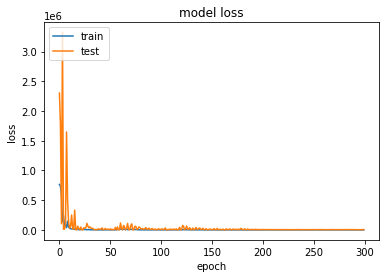



 31%|███       | 57/185 [23:16<30:45, 14.42s/it]

[1850.1294]
    Region            Country       5/1/20
0      NaN        Afghanistan  2107.680420
1      NaN            Albania   736.679321
2      NaN            Algeria  3835.565674
3      NaN            Andorra   888.479675
4      NaN             Angola     0.000000
..     ...                ...          ...
107    NaN              Egypt  5931.722168
108    NaN        El Salvador   355.658417
109    NaN  Equatorial Guinea   981.919556
110    NaN            Eritrea     0.000000
111    NaN            Estonia  1850.129395

[112 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Eswatini  has  31  values
----------------------------------------------------------------------------------------------------
nan Ethiopia 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


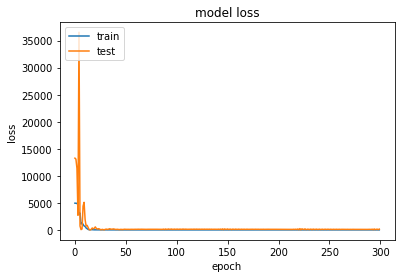



 32%|███▏      | 59/185 [23:28<24:59, 11.90s/it]

[167.0098]
    Region            Country       5/1/20
0      NaN        Afghanistan  2107.680420
1      NaN            Albania   736.679321
2      NaN            Algeria  3835.565674
3      NaN            Andorra   888.479675
4      NaN             Angola     0.000000
..     ...                ...          ...
109    NaN  Equatorial Guinea   981.919556
110    NaN            Eritrea     0.000000
111    NaN            Estonia  1850.129395
112    NaN           Eswatini     0.000000
113    NaN           Ethiopia   167.009796

[114 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Fiji  has  18  values
----------------------------------------------------------------------------------------------------
nan Finland 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


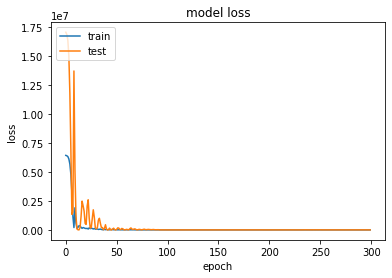



 33%|███▎      | 61/185 [23:40<20:56, 10.13s/it]

[5115.7134]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
111    NaN      Estonia  1850.129395
112    NaN     Eswatini     0.000000
113    NaN     Ethiopia   167.009796
114    NaN         Fiji     0.000000
115    NaN      Finland  5115.713379

[116 rows x 3 columns]
----------------------------------------------------------------------------------------------------
French Guiana France 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


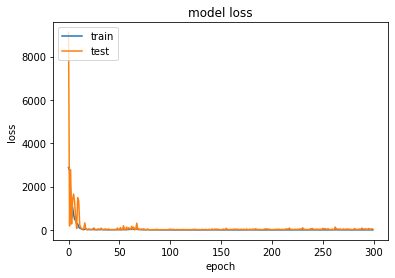

[117.811165]
            Region      Country       5/1/20
0              NaN  Afghanistan  2107.680420
1              NaN      Albania   736.679321
2              NaN      Algeria  3835.565674
3              NaN      Andorra   888.479675
4              NaN       Angola     0.000000
..             ...          ...          ...
112            NaN     Eswatini     0.000000
113            NaN     Ethiopia   167.009796
114            NaN         Fiji     0.000000
115            NaN      Finland  5115.713379
116  French Guiana       France   117.811165

[117 rows x 3 columns]
----------------------------------------------------------------------------------------------------
France  has  57  values
----------------------------------------------------------------------------------------------------
Guadeloupe France 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


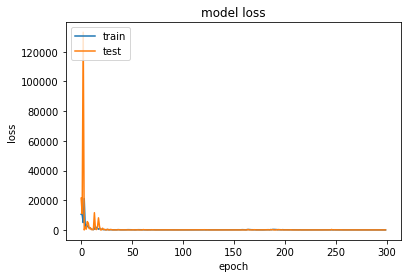

[154.66397]
               Region      Country       5/1/20
0                 NaN  Afghanistan  2107.680420
1                 NaN      Albania   736.679321
2                 NaN      Algeria  3835.565674
3                 NaN      Andorra   888.479675
4                 NaN       Angola     0.000000
..                ...          ...          ...
114               NaN         Fiji     0.000000
115               NaN      Finland  5115.713379
116     French Guiana       France   117.811165
117  French Polynesia       France     0.000000
118        Guadeloupe       France   154.663971

[119 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Mayotte France 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


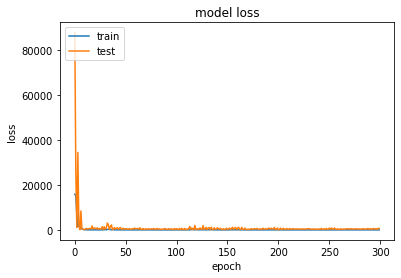

[365.37457]
               Region      Country       5/1/20
0                 NaN  Afghanistan  2107.680420
1                 NaN      Albania   736.679321
2                 NaN      Algeria  3835.565674
3                 NaN      Andorra   888.479675
4                 NaN       Angola     0.000000
..                ...          ...          ...
115               NaN      Finland  5115.713379
116     French Guiana       France   117.811165
117  French Polynesia       France     0.000000
118        Guadeloupe       France   154.663971
119           Mayotte       France   365.374573

[120 rows x 3 columns]
----------------------------------------------------------------------------------------------------
France  has  18  values
----------------------------------------------------------------------------------------------------
Reunion France 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


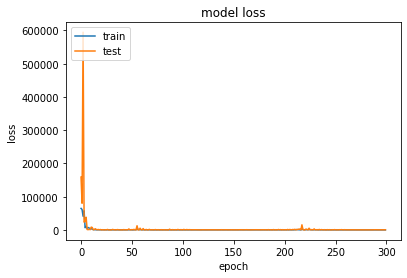

[454.20676]
               Region      Country       5/1/20
0                 NaN  Afghanistan  2107.680420
1                 NaN      Albania   736.679321
2                 NaN      Algeria  3835.565674
3                 NaN      Andorra   888.479675
4                 NaN       Angola     0.000000
..                ...          ...          ...
117  French Polynesia       France     0.000000
118        Guadeloupe       France   154.663971
119           Mayotte       France   365.374573
120     New Caledonia       France     0.000000
121           Reunion       France   454.206757

[122 rows x 3 columns]
----------------------------------------------------------------------------------------------------
France  has  6  values
----------------------------------------------------------------------------------------------------
France  has  38  values
----------------------------------------------------------------------------------------------------
Martinique France 1 1
Loss:  mse 	 Day

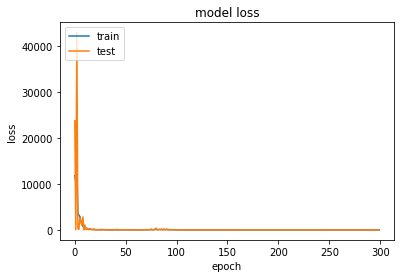

[174.94354]
               Region      Country       5/1/20
0                 NaN  Afghanistan  2107.680420
1                 NaN      Albania   736.679321
2                 NaN      Algeria  3835.565674
3                 NaN      Andorra   888.479675
4                 NaN       Angola     0.000000
..                ...          ...          ...
120     New Caledonia       France     0.000000
121           Reunion       France   454.206757
122  Saint Barthelemy       France     0.000000
123         St Martin       France     0.000000
124        Martinique       France   174.943542

[125 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan France 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


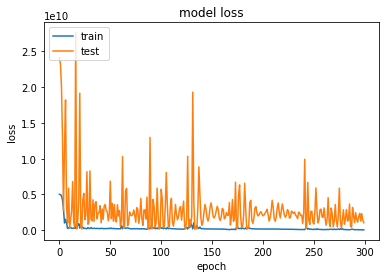



 34%|███▎      | 62/185 [25:22<1:17:22, 37.74s/it]

[271673.6]
               Region      Country         5/1/20
0                 NaN  Afghanistan    2107.680420
1                 NaN      Albania     736.679321
2                 NaN      Algeria    3835.565674
3                 NaN      Andorra     888.479675
4                 NaN       Angola       0.000000
..                ...          ...            ...
121           Reunion       France     454.206757
122  Saint Barthelemy       France       0.000000
123         St Martin       France       0.000000
124        Martinique       France     174.943542
125               NaN       France  271673.593750

[126 rows x 3 columns]
----------------------------------------------------------------------------------------------------
France  has  1  values
----------------------------------------------------------------------------------------------------
nan Gabon 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


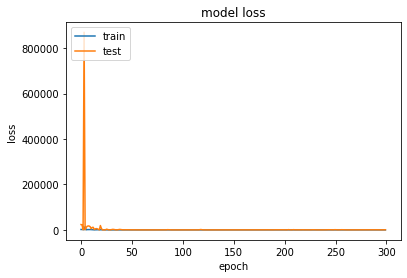



 34%|███▍      | 63/185 [25:39<1:04:02, 31.50s/it]

[251.56883]
                        Region      Country         5/1/20
0                          NaN  Afghanistan    2107.680420
1                          NaN      Albania     736.679321
2                          NaN      Algeria    3835.565674
3                          NaN      Andorra     888.479675
4                          NaN       Angola       0.000000
..                         ...          ...            ...
123                  St Martin       France       0.000000
124                 Martinique       France     174.943542
125                        NaN       France  271673.593750
126  Saint Pierre and Miquelon       France       0.000000
127                        NaN        Gabon     251.568832

[128 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Gambia  has  10  values
----------------------------------------------------------------------------------------------------
nan Georgia 0 0
Loss:  mse 	 D

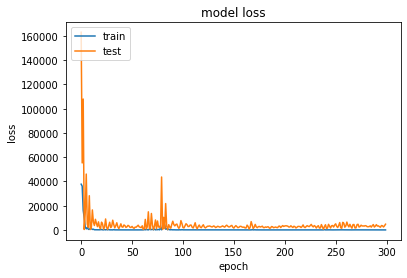



 35%|███▌      | 65/185 [25:59<50:04, 25.04s/it]  

[697.5718]
                        Region      Country         5/1/20
0                          NaN  Afghanistan    2107.680420
1                          NaN      Albania     736.679321
2                          NaN      Algeria    3835.565674
3                          NaN      Andorra     888.479675
4                          NaN       Angola       0.000000
..                         ...          ...            ...
125                        NaN       France  271673.593750
126  Saint Pierre and Miquelon       France       0.000000
127                        NaN        Gabon     251.568832
128                        NaN       Gambia       0.000000
129                        NaN      Georgia     697.571777

[130 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Germany 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


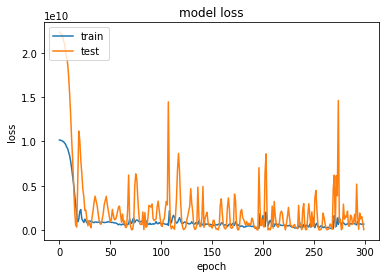



 36%|███▌      | 66/185 [26:12<42:12, 21.28s/it]

[176083.73]
                        Region      Country         5/1/20
0                          NaN  Afghanistan    2107.680420
1                          NaN      Albania     736.679321
2                          NaN      Algeria    3835.565674
3                          NaN      Andorra     888.479675
4                          NaN       Angola       0.000000
..                         ...          ...            ...
126  Saint Pierre and Miquelon       France       0.000000
127                        NaN        Gabon     251.568832
128                        NaN       Gambia       0.000000
129                        NaN      Georgia     697.571777
130                        NaN      Germany  176083.734375

[131 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Ghana NE 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


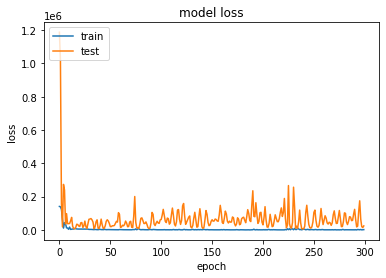



 36%|███▌      | 67/185 [26:28<38:57, 19.81s/it]

[2108.3728]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
127    NaN        Gabon     251.568832
128    NaN       Gambia       0.000000
129    NaN      Georgia     697.571777
130    NaN      Germany  176083.734375
131    NaN        Ghana    2108.372803

[132 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Greece 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


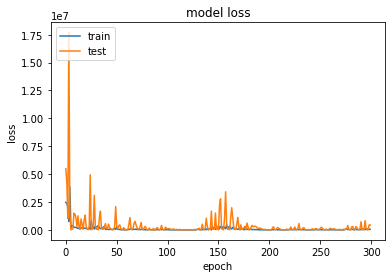



 37%|███▋      | 68/185 [26:45<36:59, 18.97s/it]

[3371.13]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
128    NaN       Gambia       0.000000
129    NaN      Georgia     697.571777
130    NaN      Germany  176083.734375
131    NaN        Ghana    2108.372803
132    NaN       Greece    3371.129883

[133 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Grenada  has  15  values
----------------------------------------------------------------------------------------------------
nan Guatemala 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


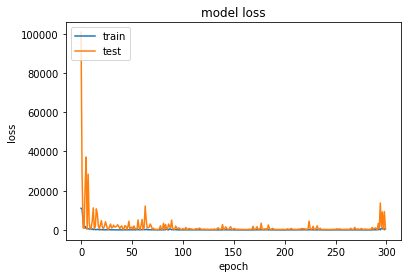



 38%|███▊      | 70/185 [27:02<30:25, 15.87s/it]

[571.6652]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
130    NaN      Germany  176083.734375
131    NaN        Ghana    2108.372803
132    NaN       Greece    3371.129883
133    NaN      Grenada       0.000000
134    NaN    Guatemala     571.665222

[135 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Guinea 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


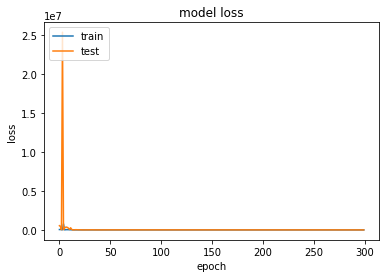



 38%|███▊      | 71/185 [27:19<30:39, 16.13s/it]

[1475.9705]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
131    NaN        Ghana  2108.372803
132    NaN       Greece  3371.129883
133    NaN      Grenada     0.000000
134    NaN    Guatemala   571.665222
135    NaN       Guinea  1475.970459

[136 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Guinea-Bissau  has  50  values
----------------------------------------------------------------------------------------------------
Guyana  has  70  values
----------------------------------------------------------------------------------------------------
Haiti  has  72  values
----------------------------------------------------------------------------------------------------
Holy See  has  9  values
-------------

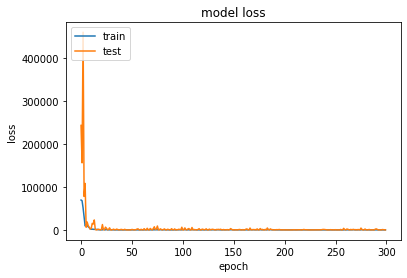



 41%|████      | 76/185 [27:36<22:19, 12.29s/it]

[592.42786]
    Region        Country       5/1/20
0      NaN    Afghanistan  2107.680420
1      NaN        Albania   736.679321
2      NaN        Algeria  3835.565674
3      NaN        Andorra   888.479675
4      NaN         Angola     0.000000
..     ...            ...          ...
136    NaN  Guinea-Bissau     0.000000
137    NaN         Guyana     0.000000
138    NaN          Haiti     0.000000
139    NaN       Holy See     0.000000
140    NaN       Honduras   592.427856

[141 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Hungary 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


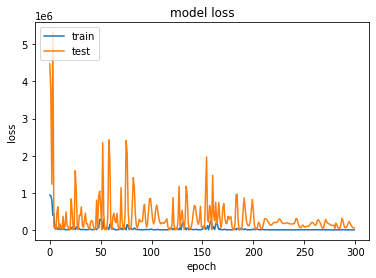



 42%|████▏     | 77/185 [27:54<25:02, 13.91s/it]

[3351.2046]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
137    NaN       Guyana     0.000000
138    NaN        Haiti     0.000000
139    NaN     Holy See     0.000000
140    NaN     Honduras   592.427856
141    NaN      Hungary  3351.204590

[142 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Iceland 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


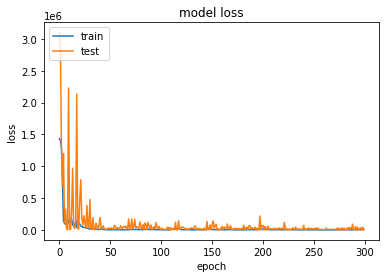



 42%|████▏     | 78/185 [28:11<26:33, 14.89s/it]

[1845.4161]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
138    NaN        Haiti     0.000000
139    NaN     Holy See     0.000000
140    NaN     Honduras   592.427856
141    NaN      Hungary  3351.204590
142    NaN      Iceland  1845.416138

[143 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan India 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


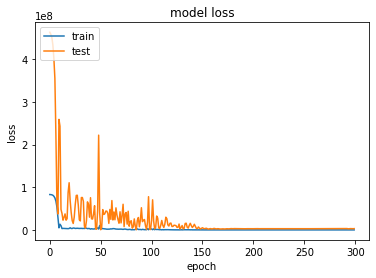



 43%|████▎     | 79/185 [28:23<24:57, 14.12s/it]

[39699.27]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
139    NaN     Holy See      0.000000
140    NaN     Honduras    592.427856
141    NaN      Hungary   3351.204590
142    NaN      Iceland   1845.416138
143    NaN        India  39699.269531

[144 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Indonesia 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


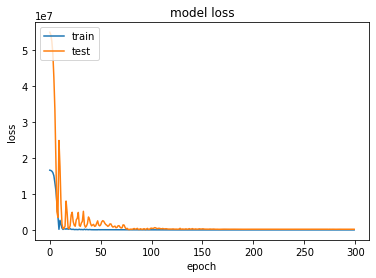



 43%|████▎     | 80/185 [28:35<23:45, 13.58s/it]

[11495.252]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
140    NaN     Honduras    592.427856
141    NaN      Hungary   3351.204590
142    NaN      Iceland   1845.416138
143    NaN        India  39699.269531
144    NaN    Indonesia  11495.251953

[145 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Iran NE 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


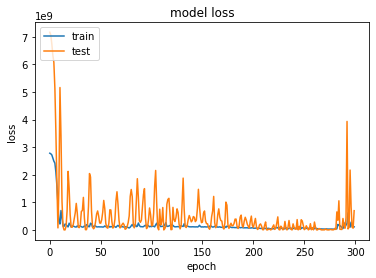



 44%|████▍     | 81/185 [28:52<25:22, 14.64s/it]

[124037.02]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
141    NaN      Hungary    3351.204590
142    NaN      Iceland    1845.416138
143    NaN        India   39699.269531
144    NaN    Indonesia   11495.251953
145    NaN         Iran  124037.023438

[146 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Iraq 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


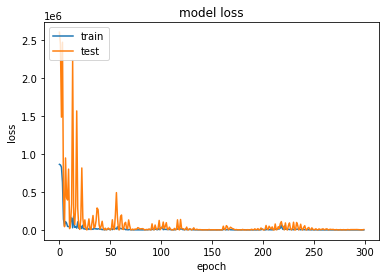



 44%|████▍     | 82/185 [29:09<26:21, 15.36s/it]

[1922.952]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
142    NaN      Iceland    1845.416138
143    NaN        India   39699.269531
144    NaN    Indonesia   11495.251953
145    NaN         Iran  124037.023438
146    NaN         Iraq    1922.952026

[147 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Ireland 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


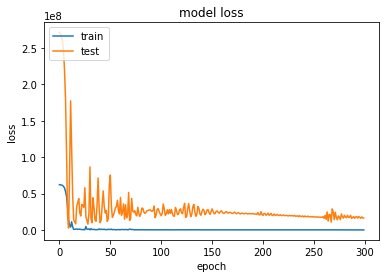



 45%|████▍     | 83/185 [29:22<24:40, 14.52s/it]

[34234.01]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
143    NaN        India   39699.269531
144    NaN    Indonesia   11495.251953
145    NaN         Iran  124037.023438
146    NaN         Iraq    1922.952026
147    NaN      Ireland   34234.011719

[148 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Israel 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


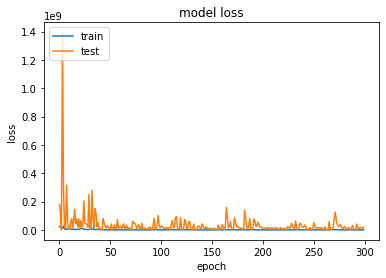



 45%|████▌     | 84/185 [29:46<28:58, 17.22s/it]

[24046.346]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
144    NaN    Indonesia   11495.251953
145    NaN         Iran  124037.023438
146    NaN         Iraq    1922.952026
147    NaN      Ireland   34234.011719
148    NaN       Israel   24046.345703

[149 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Italy 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


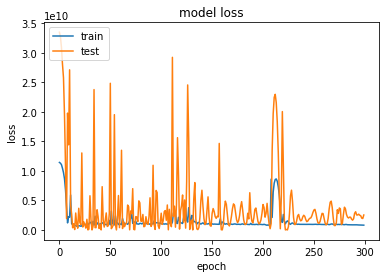



 46%|████▌     | 85/185 [30:03<29:00, 17.41s/it]

[276514.3]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
145    NaN         Iran  124037.023438
146    NaN         Iraq    1922.952026
147    NaN      Ireland   34234.011719
148    NaN       Israel   24046.345703
149    NaN        Italy  276514.312500

[150 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Jamaica 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


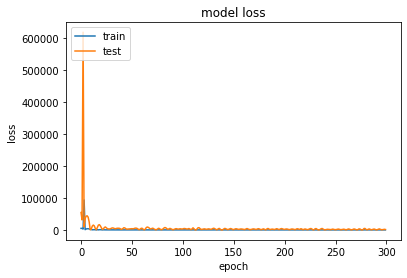



 46%|████▋     | 86/185 [30:20<28:22, 17.19s/it]

[485.809]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
146    NaN         Iraq    1922.952026
147    NaN      Ireland   34234.011719
148    NaN       Israel   24046.345703
149    NaN        Italy  276514.312500
150    NaN      Jamaica     485.808990

[151 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Japan 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


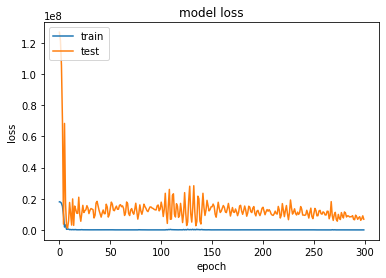



 47%|████▋     | 87/185 [30:37<27:59, 17.13s/it]

[22247.62]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
147    NaN      Ireland   34234.011719
148    NaN       Israel   24046.345703
149    NaN        Italy  276514.312500
150    NaN      Jamaica     485.808990
151    NaN        Japan   22247.619141

[152 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Jordan 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


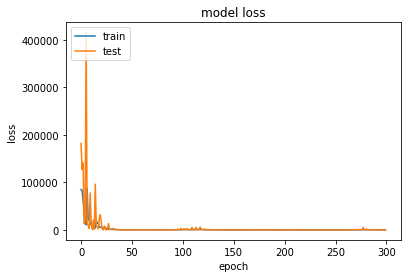



 48%|████▊     | 88/185 [30:55<27:52, 17.24s/it]

[458.36987]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
148    NaN       Israel   24046.345703
149    NaN        Italy  276514.312500
150    NaN      Jamaica     485.808990
151    NaN        Japan   22247.619141
152    NaN       Jordan     458.369873

[153 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Kazakhstan 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


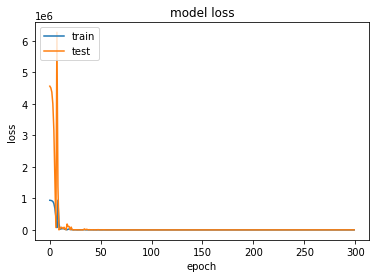



 48%|████▊     | 89/185 [31:07<25:18, 15.82s/it]

[3436.1018]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
149    NaN        Italy  276514.312500
150    NaN      Jamaica     485.808990
151    NaN        Japan   22247.619141
152    NaN       Jordan     458.369873
153    NaN   Kazakhstan    3436.101807

[154 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Kenya 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


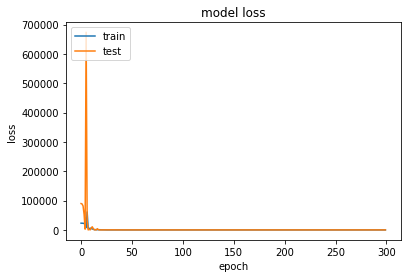



 49%|████▊     | 90/185 [31:19<23:24, 14.79s/it]

[391.5364]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
150    NaN      Jamaica    485.808990
151    NaN        Japan  22247.619141
152    NaN       Jordan    458.369873
153    NaN   Kazakhstan   3436.101807
154    NaN        Kenya    391.536407

[155 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Korea, South 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


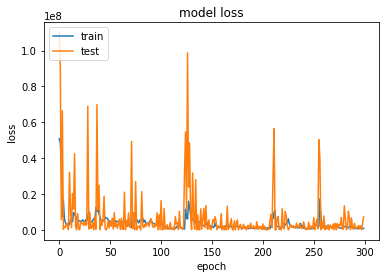



 49%|████▉     | 91/185 [31:41<26:16, 16.78s/it]

[13946.081]
    Region       Country        5/1/20
0      NaN   Afghanistan   2107.680420
1      NaN       Albania    736.679321
2      NaN       Algeria   3835.565674
3      NaN       Andorra    888.479675
4      NaN        Angola      0.000000
..     ...           ...           ...
151    NaN         Japan  22247.619141
152    NaN        Jordan    458.369873
153    NaN    Kazakhstan   3436.101807
154    NaN         Kenya    391.536407
155    NaN  Korea, South  13946.081055

[156 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Kosovo 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


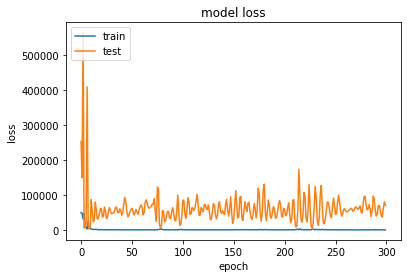



 50%|████▉     | 92/185 [31:58<26:18, 16.97s/it]

[1382.0951]
    Region       Country        5/1/20
0      NaN   Afghanistan   2107.680420
1      NaN       Albania    736.679321
2      NaN       Algeria   3835.565674
3      NaN       Andorra    888.479675
4      NaN        Angola      0.000000
..     ...           ...           ...
152    NaN        Jordan    458.369873
153    NaN    Kazakhstan   3436.101807
154    NaN         Kenya    391.536407
155    NaN  Korea, South  13946.081055
156    NaN        Kosovo   1382.095093

[157 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Kuwait 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


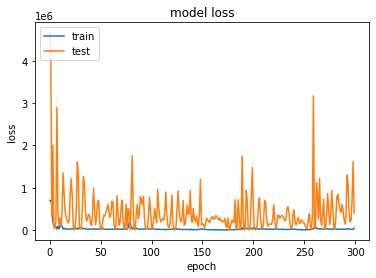



 50%|█████     | 93/185 [32:15<25:57, 16.92s/it]

[4465.24]
    Region       Country        5/1/20
0      NaN   Afghanistan   2107.680420
1      NaN       Albania    736.679321
2      NaN       Algeria   3835.565674
3      NaN       Andorra    888.479675
4      NaN        Angola      0.000000
..     ...           ...           ...
153    NaN    Kazakhstan   3436.101807
154    NaN         Kenya    391.536407
155    NaN  Korea, South  13946.081055
156    NaN        Kosovo   1382.095093
157    NaN        Kuwait   4465.240234

[158 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Kyrgyzstan 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


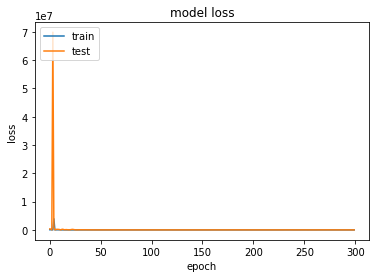



 51%|█████     | 94/185 [32:32<25:26, 16.77s/it]

[937.92896]
    Region       Country        5/1/20
0      NaN   Afghanistan   2107.680420
1      NaN       Albania    736.679321
2      NaN       Algeria   3835.565674
3      NaN       Andorra    888.479675
4      NaN        Angola      0.000000
..     ...           ...           ...
154    NaN         Kenya    391.536407
155    NaN  Korea, South  13946.081055
156    NaN        Kosovo   1382.095093
157    NaN        Kuwait   4465.240234
158    NaN    Kyrgyzstan    937.928955

[159 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Laos  has  19  values
----------------------------------------------------------------------------------------------------
nan Latvia 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


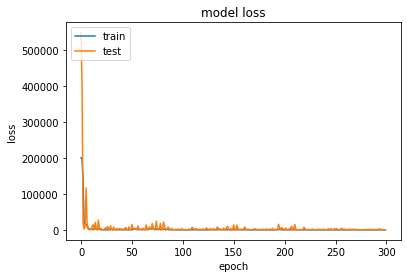



 52%|█████▏    | 96/185 [32:49<21:15, 14.33s/it]

[838.6964]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
156    NaN       Kosovo  1382.095093
157    NaN       Kuwait  4465.240234
158    NaN   Kyrgyzstan   937.928955
159    NaN         Laos     0.000000
160    NaN       Latvia   838.696411

[161 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Lebanon 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


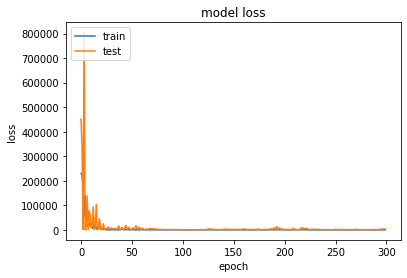



 52%|█████▏    | 97/185 [33:06<22:27, 15.31s/it]

[766.74384]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
157    NaN       Kuwait  4465.240234
158    NaN   Kyrgyzstan   937.928955
159    NaN         Laos     0.000000
160    NaN       Latvia   838.696411
161    NaN      Lebanon   766.743835

[162 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Liberia 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


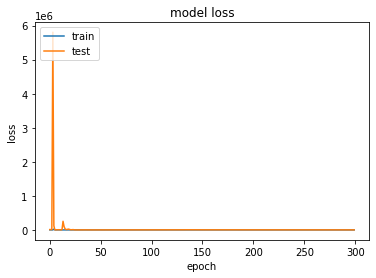



 53%|█████▎    | 98/185 [33:23<22:41, 15.65s/it]

[207.48228]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
158    NaN   Kyrgyzstan   937.928955
159    NaN         Laos     0.000000
160    NaN       Latvia   838.696411
161    NaN      Lebanon   766.743835
162    NaN      Liberia   207.482285

[163 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Libya  has  60  values
----------------------------------------------------------------------------------------------------
nan Liechtenstein 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


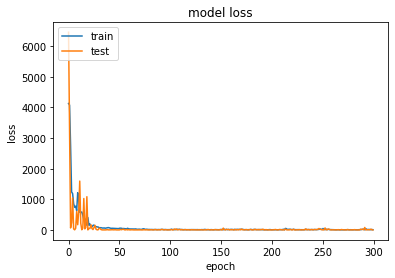



 54%|█████▍    | 100/185 [33:42<19:40, 13.88s/it]

[81.6439]
    Region        Country       5/1/20
0      NaN    Afghanistan  2107.680420
1      NaN        Albania   736.679321
2      NaN        Algeria  3835.565674
3      NaN        Andorra   888.479675
4      NaN         Angola     0.000000
..     ...            ...          ...
160    NaN         Latvia   838.696411
161    NaN        Lebanon   766.743835
162    NaN        Liberia   207.482285
163    NaN          Libya     0.000000
164    NaN  Liechtenstein    81.643898

[165 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Lithuania 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


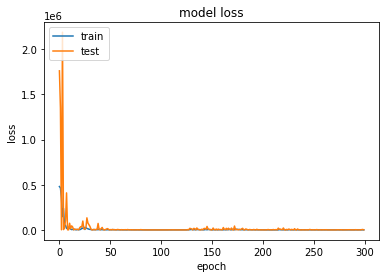



 55%|█████▍    | 101/185 [34:00<21:04, 15.05s/it]

[1631.9604]
    Region        Country       5/1/20
0      NaN    Afghanistan  2107.680420
1      NaN        Albania   736.679321
2      NaN        Algeria  3835.565674
3      NaN        Andorra   888.479675
4      NaN         Angola     0.000000
..     ...            ...          ...
161    NaN        Lebanon   766.743835
162    NaN        Liberia   207.482285
163    NaN          Libya     0.000000
164    NaN  Liechtenstein    81.643898
165    NaN      Lithuania  1631.960449

[166 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Luxembourg NE 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


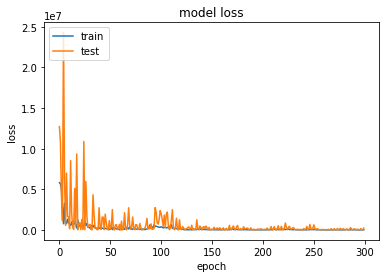



 55%|█████▌    | 102/185 [34:17<21:36, 15.62s/it]

[4354.921]
    Region        Country       5/1/20
0      NaN    Afghanistan  2107.680420
1      NaN        Albania   736.679321
2      NaN        Algeria  3835.565674
3      NaN        Andorra   888.479675
4      NaN         Angola     0.000000
..     ...            ...          ...
162    NaN        Liberia   207.482285
163    NaN          Libya     0.000000
164    NaN  Liechtenstein    81.643898
165    NaN      Lithuania  1631.960449
166    NaN     Luxembourg  4354.920898

[167 rows x 3 columns]
----------------------------------------------------------------------------------------------------
MS Zaandam  has  9  values
----------------------------------------------------------------------------------------------------
nan Madagascar 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


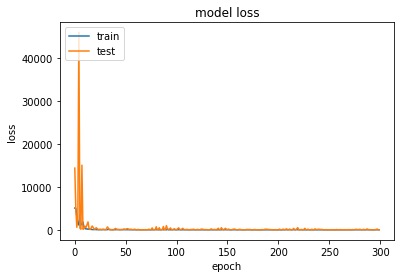



 56%|█████▌    | 104/185 [34:34<18:07, 13.43s/it]

[139.8328]
    Region        Country       5/1/20
0      NaN    Afghanistan  2107.680420
1      NaN        Albania   736.679321
2      NaN        Algeria  3835.565674
3      NaN        Andorra   888.479675
4      NaN         Angola     0.000000
..     ...            ...          ...
164    NaN  Liechtenstein    81.643898
165    NaN      Lithuania  1631.960449
166    NaN     Luxembourg  4354.920898
167    NaN     MS Zaandam     0.000000
168    NaN     Madagascar   139.832794

[169 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Malawi  has  33  values
----------------------------------------------------------------------------------------------------
nan Malaysia 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


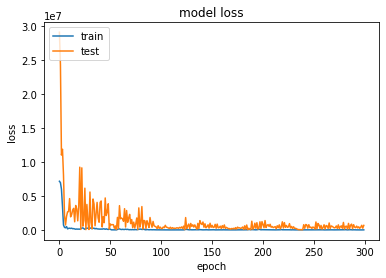



 57%|█████▋    | 106/185 [34:51<15:48, 12.00s/it]

[7495.1636]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
166    NaN   Luxembourg  4354.920898
167    NaN   MS Zaandam     0.000000
168    NaN   Madagascar   139.832794
169    NaN       Malawi     0.000000
170    NaN     Malaysia  7495.163574

[171 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Maldives 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


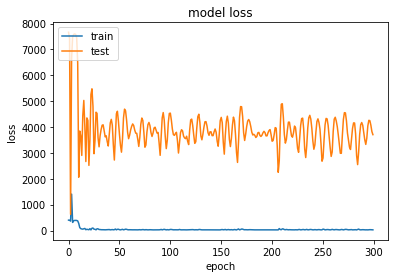



 58%|█████▊    | 107/185 [35:08<17:40, 13.60s/it]

[48.687344]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
167    NaN   MS Zaandam     0.000000
168    NaN   Madagascar   139.832794
169    NaN       Malawi     0.000000
170    NaN     Malaysia  7495.163574
171    NaN     Maldives    48.687344

[172 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Mali 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


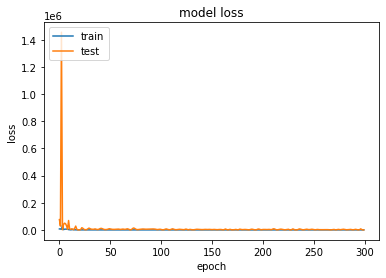



 58%|█████▊    | 108/185 [35:25<18:41, 14.56s/it]

[575.6205]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
168    NaN   Madagascar   139.832794
169    NaN       Malawi     0.000000
170    NaN     Malaysia  7495.163574
171    NaN     Maldives    48.687344
172    NaN         Mali   575.620483

[173 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Malta 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


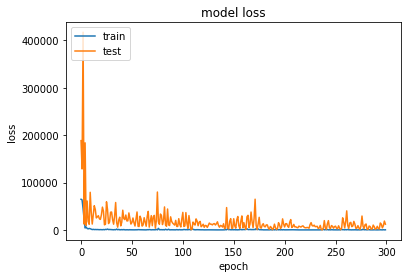



 59%|█████▉    | 109/185 [35:42<19:13, 15.18s/it]

[681.8735]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
169    NaN       Malawi     0.000000
170    NaN     Malaysia  7495.163574
171    NaN     Maldives    48.687344
172    NaN         Mali   575.620483
173    NaN        Malta   681.873474

[174 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Mauritania  has  7  values
----------------------------------------------------------------------------------------------------
nan Mauritius 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


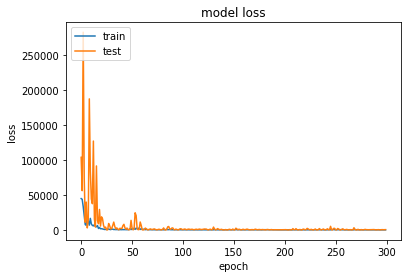



 60%|██████    | 111/185 [35:59<16:20, 13.26s/it]

[361.24948]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
171    NaN     Maldives    48.687344
172    NaN         Mali   575.620483
173    NaN        Malta   681.873474
174    NaN   Mauritania     0.000000
175    NaN    Mauritius   361.249481

[176 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Mexico 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


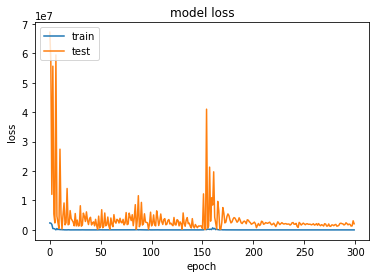



 61%|██████    | 112/185 [36:21<19:04, 15.68s/it]

[19708.541]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
172    NaN         Mali    575.620483
173    NaN        Malta    681.873474
174    NaN   Mauritania      0.000000
175    NaN    Mauritius    361.249481
176    NaN       Mexico  19708.541016

[177 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Moldova 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


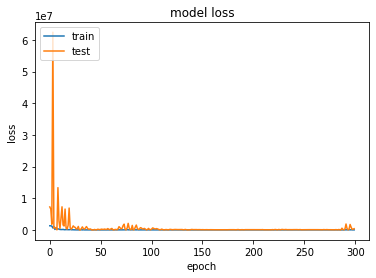



 61%|██████    | 113/185 [36:38<19:14, 16.04s/it]

[4832.189]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
173    NaN        Malta    681.873474
174    NaN   Mauritania      0.000000
175    NaN    Mauritius    361.249481
176    NaN       Mexico  19708.541016
177    NaN      Moldova   4832.188965

[178 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Monaco 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


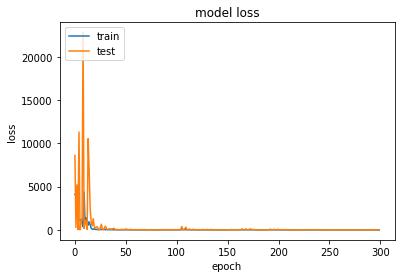



 62%|██████▏   | 114/185 [36:55<19:27, 16.44s/it]

[99.71238]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
174    NaN   Mauritania      0.000000
175    NaN    Mauritius    361.249481
176    NaN       Mexico  19708.541016
177    NaN      Moldova   4832.188965
178    NaN       Monaco     99.712379

[179 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Mongolia  has  36  values
----------------------------------------------------------------------------------------------------
nan Montenegro 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


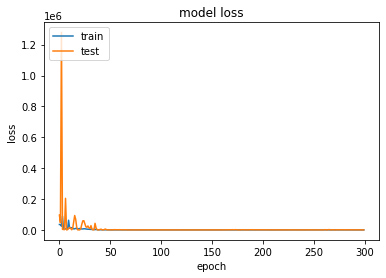



 63%|██████▎   | 116/185 [37:12<16:09, 14.05s/it]

[367.28555]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
176    NaN       Mexico  19708.541016
177    NaN      Moldova   4832.188965
178    NaN       Monaco     99.712379
179    NaN     Mongolia      0.000000
180    NaN   Montenegro    367.285553

[181 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Morocco 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


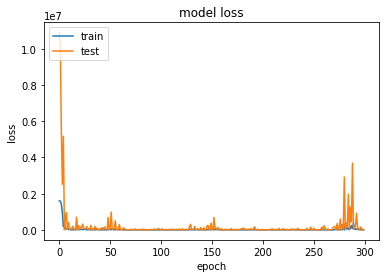



 63%|██████▎   | 117/185 [37:28<16:43, 14.76s/it]

[5419.761]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
177    NaN      Moldova  4832.188965
178    NaN       Monaco    99.712379
179    NaN     Mongolia     0.000000
180    NaN   Montenegro   367.285553
181    NaN      Morocco  5419.761230

[182 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Mozambique  has  46  values
----------------------------------------------------------------------------------------------------
Namibia  has  16  values
----------------------------------------------------------------------------------------------------
Nepal  has  48  values
----------------------------------------------------------------------------------------------------
Aruba Netherlands 1 1
Loss:  mse 	 Days b

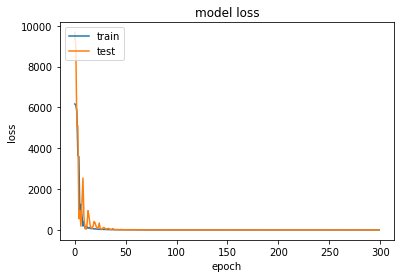

[107.09951]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
181    NaN      Morocco  5419.761230
182    NaN   Mozambique     0.000000
183    NaN      Namibia     0.000000
184    NaN        Nepal     0.000000
185  Aruba  Netherlands   107.099510

[186 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Netherlands  has  14  values
----------------------------------------------------------------------------------------------------
Netherlands  has  73  values
----------------------------------------------------------------------------------------------------
nan Netherlands 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


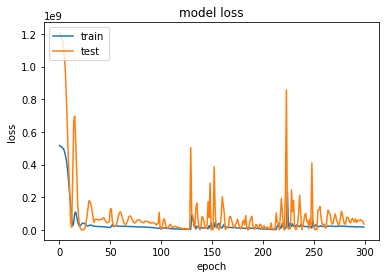



 65%|██████▌   | 121/185 [37:54<13:04, 12.26s/it]

[50413.06]
           Region      Country        5/1/20
0             NaN  Afghanistan   2107.680420
1             NaN      Albania    736.679321
2             NaN      Algeria   3835.565674
3             NaN      Andorra    888.479675
4             NaN       Angola      0.000000
..            ...          ...           ...
184           NaN        Nepal      0.000000
185         Aruba  Netherlands    107.099510
186       Curacao  Netherlands      0.000000
187  Sint Maarten  Netherlands      0.000000
188           NaN  Netherlands  50413.058594

[189 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Netherlands  has  5  values
----------------------------------------------------------------------------------------------------
nan New Zealand 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


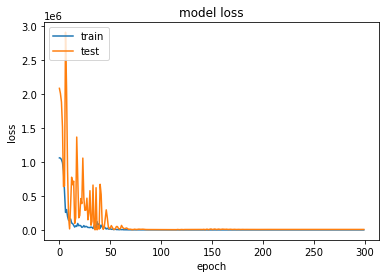



 66%|██████▌   | 122/185 [38:10<14:06, 13.44s/it]

[1681.6112]
                               Region      Country        5/1/20
0                                 NaN  Afghanistan   2107.680420
1                                 NaN      Albania    736.679321
2                                 NaN      Algeria   3835.565674
3                                 NaN      Andorra    888.479675
4                                 NaN       Angola      0.000000
..                                ...          ...           ...
186                           Curacao  Netherlands      0.000000
187                      Sint Maarten  Netherlands      0.000000
188                               NaN  Netherlands  50413.058594
189  Bonaire, Sint Eustatius and Saba  Netherlands      0.000000
190                               NaN  New Zealand   1681.611206

[191 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Nicaragua  has  11  values
--------------------------------------------------------

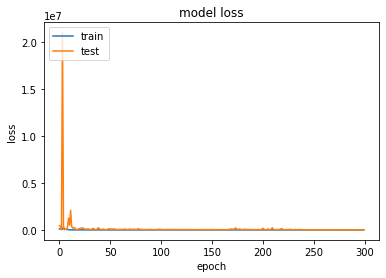



 67%|██████▋   | 124/185 [38:27<12:07, 11.92s/it]

[959.62555]
                               Region      Country        5/1/20
0                                 NaN  Afghanistan   2107.680420
1                                 NaN      Albania    736.679321
2                                 NaN      Algeria   3835.565674
3                                 NaN      Andorra    888.479675
4                                 NaN       Angola      0.000000
..                                ...          ...           ...
188                               NaN  Netherlands  50413.058594
189  Bonaire, Sint Eustatius and Saba  Netherlands      0.000000
190                               NaN  New Zealand   1681.611206
191                               NaN    Nicaragua      0.000000
192                               NaN        Niger    959.625549

[193 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Nigeria NE 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


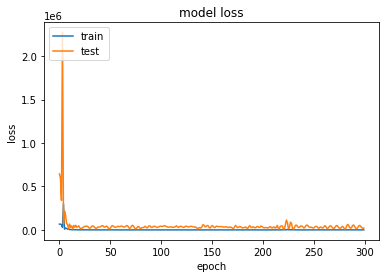



 68%|██████▊   | 125/185 [38:44<13:18, 13.31s/it]

[1017.73065]
                               Region      Country       5/1/20
0                                 NaN  Afghanistan  2107.680420
1                                 NaN      Albania   736.679321
2                                 NaN      Algeria  3835.565674
3                                 NaN      Andorra   888.479675
4                                 NaN       Angola     0.000000
..                                ...          ...          ...
189  Bonaire, Sint Eustatius and Saba  Netherlands     0.000000
190                               NaN  New Zealand  1681.611206
191                               NaN    Nicaragua     0.000000
192                               NaN        Niger   959.625549
193                               NaN      Nigeria  1017.730652

[194 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan North Macedonia 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


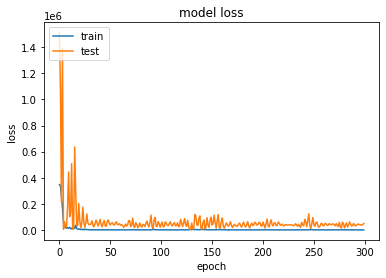



 68%|██████▊   | 126/185 [39:01<14:11, 14.44s/it]

[2118.696]
    Region          Country       5/1/20
0      NaN      Afghanistan  2107.680420
1      NaN          Albania   736.679321
2      NaN          Algeria  3835.565674
3      NaN          Andorra   888.479675
4      NaN           Angola     0.000000
..     ...              ...          ...
190    NaN      New Zealand  1681.611206
191    NaN        Nicaragua     0.000000
192    NaN            Niger   959.625549
193    NaN          Nigeria  1017.730652
194    NaN  North Macedonia  2118.696045

[195 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Norway 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


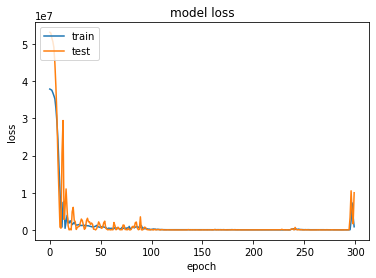



 69%|██████▊   | 127/185 [39:13<13:23, 13.85s/it]

[11262.997]
    Region          Country        5/1/20
0      NaN      Afghanistan   2107.680420
1      NaN          Albania    736.679321
2      NaN          Algeria   3835.565674
3      NaN          Andorra    888.479675
4      NaN           Angola      0.000000
..     ...              ...           ...
191    NaN        Nicaragua      0.000000
192    NaN            Niger    959.625549
193    NaN          Nigeria   1017.730652
194    NaN  North Macedonia   2118.696045
195    NaN           Norway  11262.997070

[196 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Oman 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


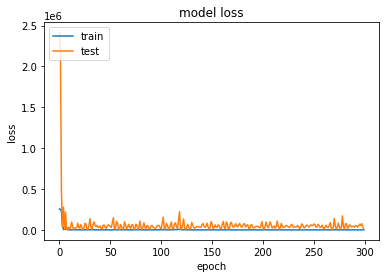



 69%|██████▉   | 128/185 [39:29<13:52, 14.60s/it]

[3173.5374]
    Region          Country        5/1/20
0      NaN      Afghanistan   2107.680420
1      NaN          Albania    736.679321
2      NaN          Algeria   3835.565674
3      NaN          Andorra    888.479675
4      NaN           Angola      0.000000
..     ...              ...           ...
192    NaN            Niger    959.625549
193    NaN          Nigeria   1017.730652
194    NaN  North Macedonia   2118.696045
195    NaN           Norway  11262.997070
196    NaN             Oman   3173.537354

[197 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Pakistan 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


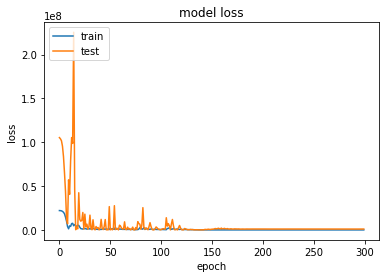



 70%|██████▉   | 129/185 [39:42<12:57, 13.89s/it]

[13144.508]
    Region          Country        5/1/20
0      NaN      Afghanistan   2107.680420
1      NaN          Albania    736.679321
2      NaN          Algeria   3835.565674
3      NaN          Andorra    888.479675
4      NaN           Angola      0.000000
..     ...              ...           ...
193    NaN          Nigeria   1017.730652
194    NaN  North Macedonia   2118.696045
195    NaN           Norway  11262.997070
196    NaN             Oman   3173.537354
197    NaN         Pakistan  13144.507812

[198 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Panama 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


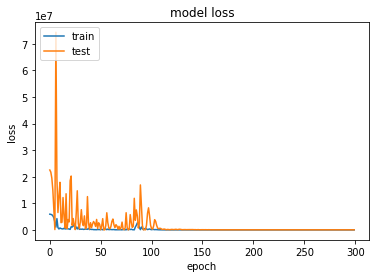



 70%|███████   | 130/185 [39:55<12:33, 13.70s/it]

[6880.784]
    Region          Country        5/1/20
0      NaN      Afghanistan   2107.680420
1      NaN          Albania    736.679321
2      NaN          Algeria   3835.565674
3      NaN          Andorra    888.479675
4      NaN           Angola      0.000000
..     ...              ...           ...
194    NaN  North Macedonia   2118.696045
195    NaN           Norway  11262.997070
196    NaN             Oman   3173.537354
197    NaN         Pakistan  13144.507812
198    NaN           Panama   6880.784180

[199 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Papua New Guinea  has  8  values
----------------------------------------------------------------------------------------------------
nan Paraguay 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


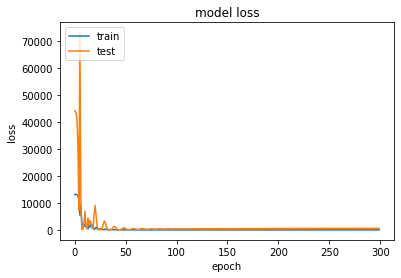



 71%|███████▏  | 132/185 [40:07<10:06, 11.44s/it]

[323.75586]
    Region           Country        5/1/20
0      NaN       Afghanistan   2107.680420
1      NaN           Albania    736.679321
2      NaN           Algeria   3835.565674
3      NaN           Andorra    888.479675
4      NaN            Angola      0.000000
..     ...               ...           ...
196    NaN              Oman   3173.537354
197    NaN          Pakistan  13144.507812
198    NaN            Panama   6880.784180
199    NaN  Papua New Guinea      0.000000
200    NaN          Paraguay    323.755859

[201 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Peru 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


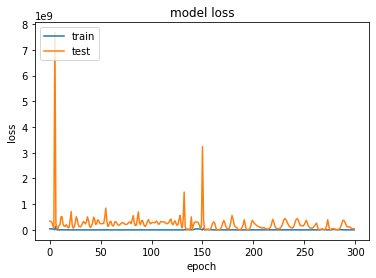



 72%|███████▏  | 133/185 [40:24<11:11, 12.92s/it]

[49946.777]
    Region           Country        5/1/20
0      NaN       Afghanistan   2107.680420
1      NaN           Albania    736.679321
2      NaN           Algeria   3835.565674
3      NaN           Andorra    888.479675
4      NaN            Angola      0.000000
..     ...               ...           ...
197    NaN          Pakistan  13144.507812
198    NaN            Panama   6880.784180
199    NaN  Papua New Guinea      0.000000
200    NaN          Paraguay    323.755859
201    NaN              Peru  49946.777344

[202 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Philippines NE 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


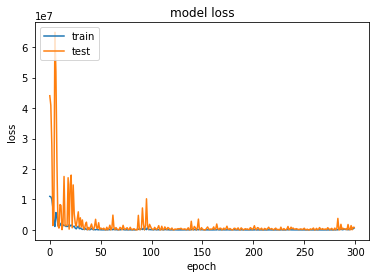



 72%|███████▏  | 134/185 [40:40<11:58, 14.08s/it]

[9984.223]
    Region           Country        5/1/20
0      NaN       Afghanistan   2107.680420
1      NaN           Albania    736.679321
2      NaN           Algeria   3835.565674
3      NaN           Andorra    888.479675
4      NaN            Angola      0.000000
..     ...               ...           ...
198    NaN            Panama   6880.784180
199    NaN  Papua New Guinea      0.000000
200    NaN          Paraguay    323.755859
201    NaN              Peru  49946.777344
202    NaN       Philippines   9984.222656

[203 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Poland 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


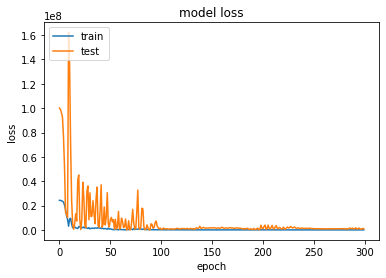



 73%|███████▎  | 135/185 [40:54<11:36, 13.93s/it]

[14993.201]
    Region           Country        5/1/20
0      NaN       Afghanistan   2107.680420
1      NaN           Albania    736.679321
2      NaN           Algeria   3835.565674
3      NaN           Andorra    888.479675
4      NaN            Angola      0.000000
..     ...               ...           ...
199    NaN  Papua New Guinea      0.000000
200    NaN          Paraguay    323.755859
201    NaN              Peru  49946.777344
202    NaN       Philippines   9984.222656
203    NaN            Poland  14993.201172

[204 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Portugal 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


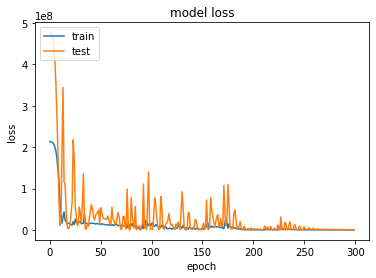



 74%|███████▎  | 136/185 [41:07<11:03, 13.54s/it]

[24965.3]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
200    NaN     Paraguay    323.755859
201    NaN         Peru  49946.777344
202    NaN  Philippines   9984.222656
203    NaN       Poland  14993.201172
204    NaN     Portugal  24965.300781

[205 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Qatar 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


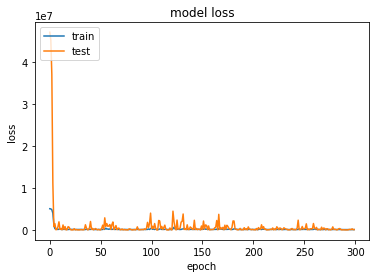



 74%|███████▍  | 137/185 [41:23<11:37, 14.53s/it]

[12720.355]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
201    NaN         Peru  49946.777344
202    NaN  Philippines   9984.222656
203    NaN       Poland  14993.201172
204    NaN     Portugal  24965.300781
205    NaN        Qatar  12720.355469

[206 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Romania 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


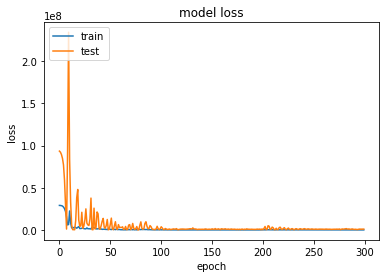



 75%|███████▍  | 138/185 [41:36<10:54, 13.93s/it]

[14182.229]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
202    NaN  Philippines   9984.222656
203    NaN       Poland  14993.201172
204    NaN     Portugal  24965.300781
205    NaN        Qatar  12720.355469
206    NaN      Romania  14182.228516

[207 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Russia 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


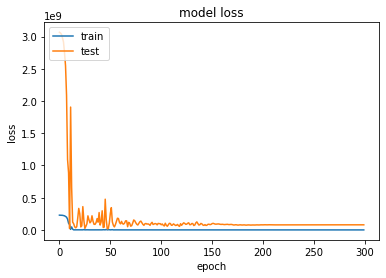



 75%|███████▌  | 139/185 [41:49<10:22, 13.54s/it]

[153944.84]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
203    NaN       Poland   14993.201172
204    NaN     Portugal   24965.300781
205    NaN        Qatar   12720.355469
206    NaN      Romania   14182.228516
207    NaN       Russia  153944.843750

[208 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Rwanda NE 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


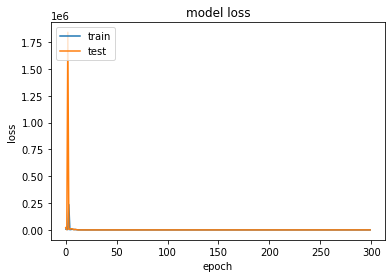



 76%|███████▌  | 140/185 [42:06<11:03, 14.74s/it]

[181.8856]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
204    NaN     Portugal   24965.300781
205    NaN        Qatar   12720.355469
206    NaN      Romania   14182.228516
207    NaN       Russia  153944.843750
208    NaN       Rwanda     181.885605

[209 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Saint Kitts and Nevis  has  15  values
----------------------------------------------------------------------------------------------------
Saint Lucia  has  15  values
----------------------------------------------------------------------------------------------------
Saint Vincent and the Grenadines  has  13  values
----------------------------------------------------------------------------

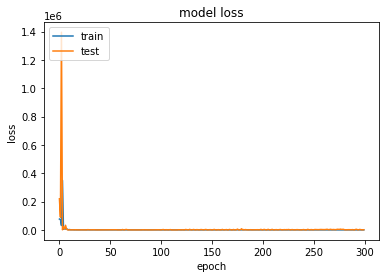



 78%|███████▊  | 144/185 [42:26<08:04, 11.82s/it]

[663.4355]
    Region                           Country       5/1/20
0      NaN                       Afghanistan  2107.680420
1      NaN                           Albania   736.679321
2      NaN                           Algeria  3835.565674
3      NaN                           Andorra   888.479675
4      NaN                            Angola     0.000000
..     ...                               ...          ...
208    NaN                            Rwanda   181.885605
209    NaN             Saint Kitts and Nevis     0.000000
210    NaN                       Saint Lucia     0.000000
211    NaN  Saint Vincent and the Grenadines     0.000000
212    NaN                        San Marino   663.435486

[213 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Sao Tome and Principe  has  4  values
----------------------------------------------------------------------------------------------------
nan Saudi Arabia 0 1
Loss:  m

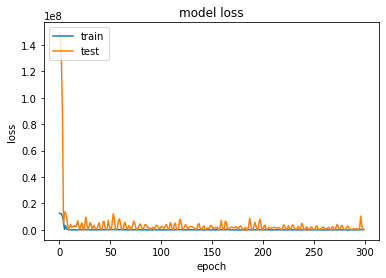



 79%|███████▉  | 146/185 [42:43<07:03, 10.86s/it]

[23111.27]
    Region                           Country        5/1/20
0      NaN                       Afghanistan   2107.680420
1      NaN                           Albania    736.679321
2      NaN                           Algeria   3835.565674
3      NaN                           Andorra    888.479675
4      NaN                            Angola      0.000000
..     ...                               ...           ...
210    NaN                       Saint Lucia      0.000000
211    NaN  Saint Vincent and the Grenadines      0.000000
212    NaN                        San Marino    663.435486
213    NaN             Sao Tome and Principe      0.000000
214    NaN                      Saudi Arabia  23111.269531

[215 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Senegal 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


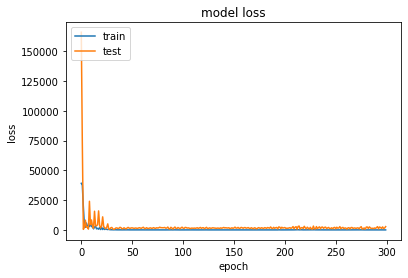



 79%|███████▉  | 147/185 [43:02<08:16, 13.06s/it]

[472.58194]
    Region                           Country        5/1/20
0      NaN                       Afghanistan   2107.680420
1      NaN                           Albania    736.679321
2      NaN                           Algeria   3835.565674
3      NaN                           Andorra    888.479675
4      NaN                            Angola      0.000000
..     ...                               ...           ...
211    NaN  Saint Vincent and the Grenadines      0.000000
212    NaN                        San Marino    663.435486
213    NaN             Sao Tome and Principe      0.000000
214    NaN                      Saudi Arabia  23111.269531
215    NaN                           Senegal    472.581940

[216 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Serbia 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


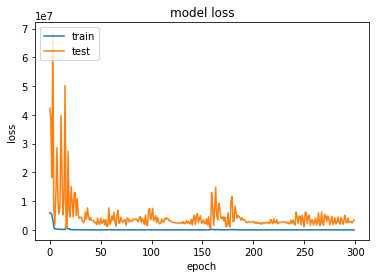



 80%|████████  | 148/185 [43:19<08:48, 14.29s/it]

[14040.244]
    Region                Country        5/1/20
0      NaN            Afghanistan   2107.680420
1      NaN                Albania    736.679321
2      NaN                Algeria   3835.565674
3      NaN                Andorra    888.479675
4      NaN                 Angola      0.000000
..     ...                    ...           ...
212    NaN             San Marino    663.435486
213    NaN  Sao Tome and Principe      0.000000
214    NaN           Saudi Arabia  23111.269531
215    NaN                Senegal    472.581940
216    NaN                 Serbia  14040.244141

[217 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Seychelles  has  11  values
----------------------------------------------------------------------------------------------------
Sierra Leone  has  64  values
----------------------------------------------------------------------------------------------------
nan Singapore NE 1
Loss:  m

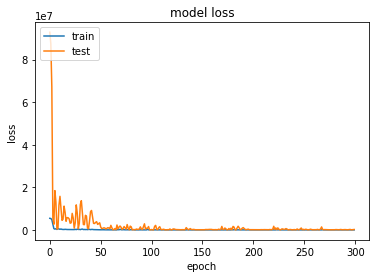



 82%|████████▏ | 151/185 [43:36<06:38, 11.72s/it]

[23153.43]
    Region       Country        5/1/20
0      NaN   Afghanistan   2107.680420
1      NaN       Albania    736.679321
2      NaN       Algeria   3835.565674
3      NaN       Andorra    888.479675
4      NaN        Angola      0.000000
..     ...           ...           ...
215    NaN       Senegal    472.581940
216    NaN        Serbia  14040.244141
217    NaN    Seychelles      0.000000
218    NaN  Sierra Leone      0.000000
219    NaN     Singapore  23153.429688

[220 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Slovakia 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


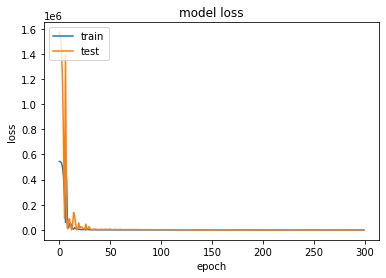



 82%|████████▏ | 152/185 [43:48<06:33, 11.94s/it]

[1790.2341]
    Region       Country        5/1/20
0      NaN   Afghanistan   2107.680420
1      NaN       Albania    736.679321
2      NaN       Algeria   3835.565674
3      NaN       Andorra    888.479675
4      NaN        Angola      0.000000
..     ...           ...           ...
216    NaN        Serbia  14040.244141
217    NaN    Seychelles      0.000000
218    NaN  Sierra Leone      0.000000
219    NaN     Singapore  23153.429688
220    NaN      Slovakia   1790.234131

[221 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Slovenia 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


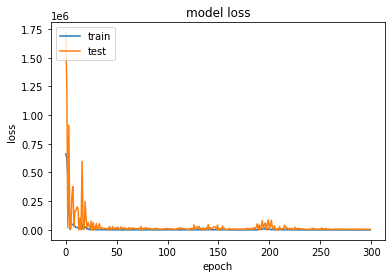



 83%|████████▎ | 153/185 [44:06<07:19, 13.72s/it]

[1582.6167]
    Region       Country        5/1/20
0      NaN   Afghanistan   2107.680420
1      NaN       Albania    736.679321
2      NaN       Algeria   3835.565674
3      NaN       Andorra    888.479675
4      NaN        Angola      0.000000
..     ...           ...           ...
217    NaN    Seychelles      0.000000
218    NaN  Sierra Leone      0.000000
219    NaN     Singapore  23153.429688
220    NaN      Slovakia   1790.234131
221    NaN      Slovenia   1582.616699

[222 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Somalia 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


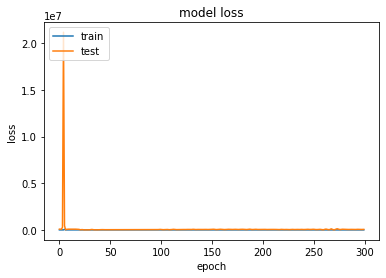



 83%|████████▎ | 154/185 [44:23<07:32, 14.60s/it]

[4165.275]
    Region       Country        5/1/20
0      NaN   Afghanistan   2107.680420
1      NaN       Albania    736.679321
2      NaN       Algeria   3835.565674
3      NaN       Andorra    888.479675
4      NaN        Angola      0.000000
..     ...           ...           ...
218    NaN  Sierra Leone      0.000000
219    NaN     Singapore  23153.429688
220    NaN      Slovakia   1790.234131
221    NaN      Slovenia   1582.616699
222    NaN       Somalia   4165.274902

[223 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan South Africa 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


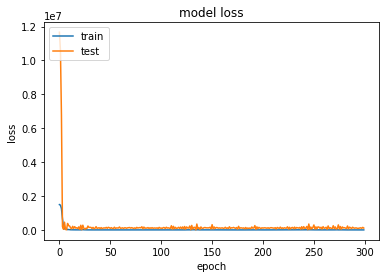



 84%|████████▍ | 155/185 [44:40<07:41, 15.39s/it]

[4462.846]
    Region       Country        5/1/20
0      NaN   Afghanistan   2107.680420
1      NaN       Albania    736.679321
2      NaN       Algeria   3835.565674
3      NaN       Andorra    888.479675
4      NaN        Angola      0.000000
..     ...           ...           ...
219    NaN     Singapore  23153.429688
220    NaN      Slovakia   1790.234131
221    NaN      Slovenia   1582.616699
222    NaN       Somalia   4165.274902
223    NaN  South Africa   4462.846191

[224 rows x 3 columns]
----------------------------------------------------------------------------------------------------
South Sudan  has  5  values
----------------------------------------------------------------------------------------------------
nan Spain NE 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


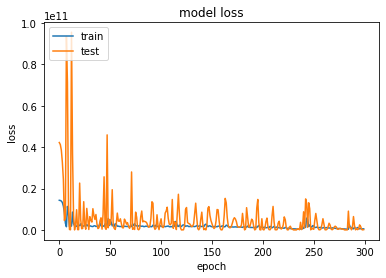



 85%|████████▍ | 157/185 [44:58<06:15, 13.41s/it]

[255713.3]
    Region       Country         5/1/20
0      NaN   Afghanistan    2107.680420
1      NaN       Albania     736.679321
2      NaN       Algeria    3835.565674
3      NaN       Andorra     888.479675
4      NaN        Angola       0.000000
..     ...           ...            ...
221    NaN      Slovenia    1582.616699
222    NaN       Somalia    4165.274902
223    NaN  South Africa    4462.846191
224    NaN   South Sudan       0.000000
225    NaN         Spain  255713.296875

[226 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Sri Lanka 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


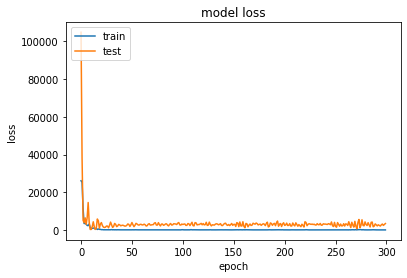



 85%|████████▌ | 158/185 [45:15<06:33, 14.57s/it]

[341.78528]
    Region       Country         5/1/20
0      NaN   Afghanistan    2107.680420
1      NaN       Albania     736.679321
2      NaN       Algeria    3835.565674
3      NaN       Andorra     888.479675
4      NaN        Angola       0.000000
..     ...           ...            ...
222    NaN       Somalia    4165.274902
223    NaN  South Africa    4462.846191
224    NaN   South Sudan       0.000000
225    NaN         Spain  255713.296875
226    NaN     Sri Lanka     341.785278

[227 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Sudan 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


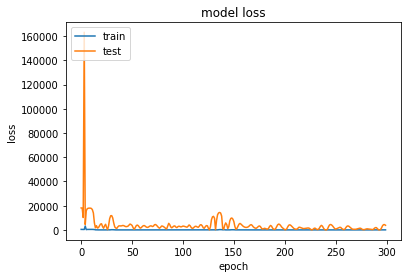



 86%|████████▌ | 159/185 [45:32<06:35, 15.20s/it]

[300.47928]
    Region       Country         5/1/20
0      NaN   Afghanistan    2107.680420
1      NaN       Albania     736.679321
2      NaN       Algeria    3835.565674
3      NaN       Andorra     888.479675
4      NaN        Angola       0.000000
..     ...           ...            ...
223    NaN  South Africa    4462.846191
224    NaN   South Sudan       0.000000
225    NaN         Spain  255713.296875
226    NaN     Sri Lanka     341.785278
227    NaN         Sudan     300.479279

[228 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Suriname  has  10  values
----------------------------------------------------------------------------------------------------
nan Sweden 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


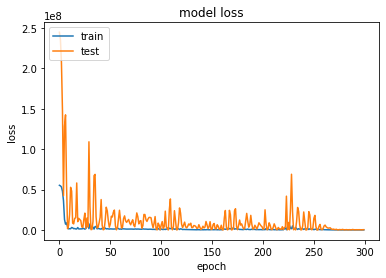



 87%|████████▋ | 161/185 [45:49<05:17, 13.22s/it]

[20747.898]
    Region      Country         5/1/20
0      NaN  Afghanistan    2107.680420
1      NaN      Albania     736.679321
2      NaN      Algeria    3835.565674
3      NaN      Andorra     888.479675
4      NaN       Angola       0.000000
..     ...          ...            ...
225    NaN        Spain  255713.296875
226    NaN    Sri Lanka     341.785278
227    NaN        Sudan     300.479279
228    NaN     Suriname       0.000000
229    NaN       Sweden   20747.898438

[230 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Switzerland 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


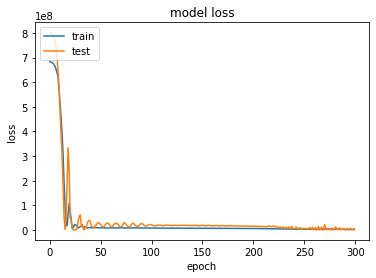



 88%|████████▊ | 162/185 [46:02<05:03, 13.20s/it]

[32637.617]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
226    NaN    Sri Lanka    341.785278
227    NaN        Sudan    300.479279
228    NaN     Suriname      0.000000
229    NaN       Sweden  20747.898438
230    NaN  Switzerland  32637.617188

[231 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Syria  has  42  values
----------------------------------------------------------------------------------------------------
nan Taiwan* 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


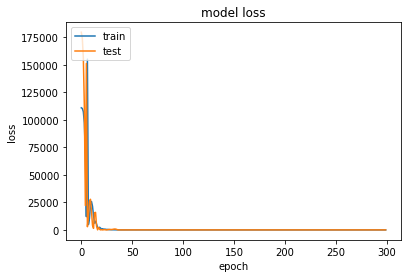



 89%|████████▊ | 164/185 [46:15<03:53, 11.14s/it]

[446.0975]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
228    NaN     Suriname      0.000000
229    NaN       Sweden  20747.898438
230    NaN  Switzerland  32637.617188
231    NaN        Syria      0.000000
232    NaN      Taiwan*    446.097504

[233 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Tanzania 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


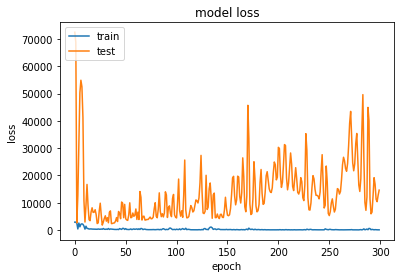



 89%|████████▉ | 165/185 [46:32<04:17, 12.86s/it]

[1759.1333]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
229    NaN       Sweden  20747.898438
230    NaN  Switzerland  32637.617188
231    NaN        Syria      0.000000
232    NaN      Taiwan*    446.097504
233    NaN     Tanzania   1759.133301

[234 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Thailand 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


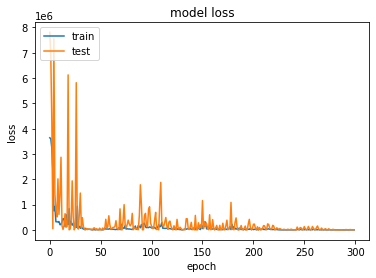



 90%|████████▉ | 166/185 [46:48<04:27, 14.07s/it]

[3089.6846]
    Region      Country        5/1/20
0      NaN  Afghanistan   2107.680420
1      NaN      Albania    736.679321
2      NaN      Algeria   3835.565674
3      NaN      Andorra    888.479675
4      NaN       Angola      0.000000
..     ...          ...           ...
230    NaN  Switzerland  32637.617188
231    NaN        Syria      0.000000
232    NaN      Taiwan*    446.097504
233    NaN     Tanzania   1759.133301
234    NaN     Thailand   3089.684570

[235 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Timor-Leste  has  23  values
----------------------------------------------------------------------------------------------------
nan Togo 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


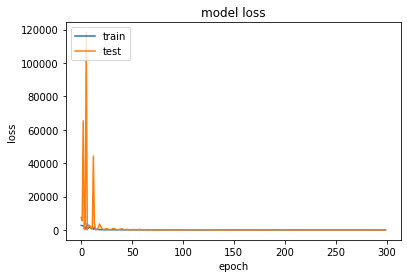



 91%|█████████ | 168/185 [47:06<03:33, 12.55s/it]

[94.65585]
    Region      Country       5/1/20
0      NaN  Afghanistan  2107.680420
1      NaN      Albania   736.679321
2      NaN      Algeria  3835.565674
3      NaN      Andorra   888.479675
4      NaN       Angola     0.000000
..     ...          ...          ...
232    NaN      Taiwan*   446.097504
233    NaN     Tanzania  1759.133301
234    NaN     Thailand  3089.684570
235    NaN  Timor-Leste     0.000000
236    NaN         Togo    94.655853

[237 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Trinidad and Tobago 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


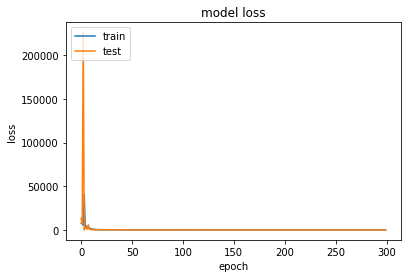



 91%|█████████▏| 169/185 [47:23<03:40, 13.79s/it]

[115.75547]
    Region              Country       5/1/20
0      NaN          Afghanistan  2107.680420
1      NaN              Albania   736.679321
2      NaN              Algeria  3835.565674
3      NaN              Andorra   888.479675
4      NaN               Angola     0.000000
..     ...                  ...          ...
233    NaN             Tanzania  1759.133301
234    NaN             Thailand  3089.684570
235    NaN          Timor-Leste     0.000000
236    NaN                 Togo    94.655853
237    NaN  Trinidad and Tobago   115.755470

[238 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Tunisia 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


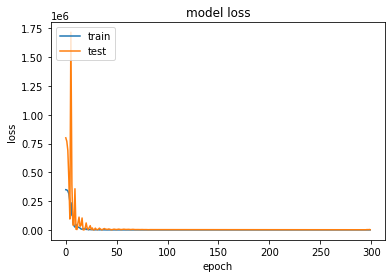



 92%|█████████▏| 170/185 [47:40<03:39, 14.63s/it]

[1142.6959]
    Region              Country       5/1/20
0      NaN          Afghanistan  2107.680420
1      NaN              Albania   736.679321
2      NaN              Algeria  3835.565674
3      NaN              Andorra   888.479675
4      NaN               Angola     0.000000
..     ...                  ...          ...
234    NaN             Thailand  3089.684570
235    NaN          Timor-Leste     0.000000
236    NaN                 Togo    94.655853
237    NaN  Trinidad and Tobago   115.755470
238    NaN              Tunisia  1142.695923

[239 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Turkey 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


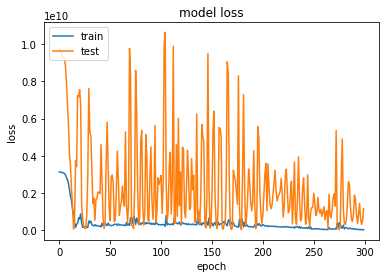



 92%|█████████▏| 171/185 [47:53<03:20, 14.30s/it]

[202760.84]
    Region              Country         5/1/20
0      NaN          Afghanistan    2107.680420
1      NaN              Albania     736.679321
2      NaN              Algeria    3835.565674
3      NaN              Andorra     888.479675
4      NaN               Angola       0.000000
..     ...                  ...            ...
235    NaN          Timor-Leste       0.000000
236    NaN                 Togo      94.655853
237    NaN  Trinidad and Tobago     115.755470
238    NaN              Tunisia    1142.695923
239    NaN               Turkey  202760.843750

[240 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan US 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


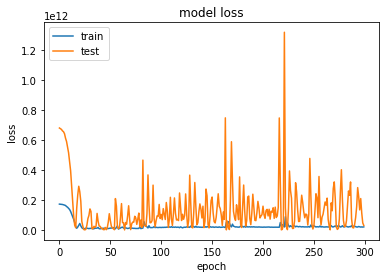



 93%|█████████▎| 172/185 [48:06<02:59, 13.83s/it]

[1415137.4]
    Region              Country        5/1/20
0      NaN          Afghanistan  2.107680e+03
1      NaN              Albania  7.366793e+02
2      NaN              Algeria  3.835566e+03
3      NaN              Andorra  8.884797e+02
4      NaN               Angola  0.000000e+00
..     ...                  ...           ...
236    NaN                 Togo  9.465585e+01
237    NaN  Trinidad and Tobago  1.157555e+02
238    NaN              Tunisia  1.142696e+03
239    NaN               Turkey  2.027608e+05
240    NaN                   US  1.415137e+06

[241 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Uganda  has  74  values
----------------------------------------------------------------------------------------------------
nan Ukraine 0 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


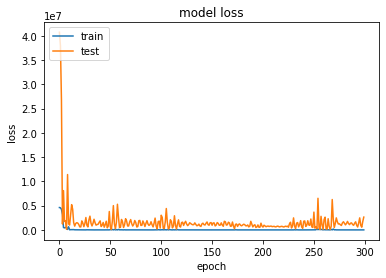



 94%|█████████▍| 174/185 [48:23<02:13, 12.17s/it]

[15017.744]
    Region      Country        5/1/20
0      NaN  Afghanistan  2.107680e+03
1      NaN      Albania  7.366793e+02
2      NaN      Algeria  3.835566e+03
3      NaN      Andorra  8.884797e+02
4      NaN       Angola  0.000000e+00
..     ...          ...           ...
238    NaN      Tunisia  1.142696e+03
239    NaN       Turkey  2.027608e+05
240    NaN           US  1.415137e+06
241    NaN       Uganda  0.000000e+00
242    NaN      Ukraine  1.501774e+04

[243 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan United Arab Emirates 0 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


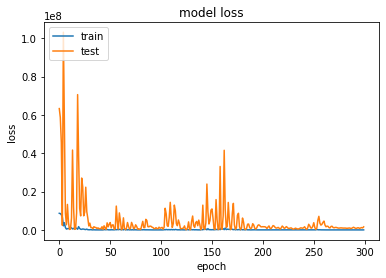



 95%|█████████▍| 175/185 [48:40<02:15, 13.60s/it]

[15870.536]
    Region               Country        5/1/20
0      NaN           Afghanistan  2.107680e+03
1      NaN               Albania  7.366793e+02
2      NaN               Algeria  3.835566e+03
3      NaN               Andorra  8.884797e+02
4      NaN                Angola  0.000000e+00
..     ...                   ...           ...
239    NaN                Turkey  2.027608e+05
240    NaN                    US  1.415137e+06
241    NaN                Uganda  0.000000e+00
242    NaN               Ukraine  1.501774e+04
243    NaN  United Arab Emirates  1.587054e+04

[244 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Bermuda United Kingdom 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


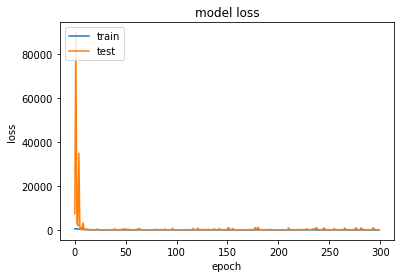

[178.69273]
      Region               Country        5/1/20
0        NaN           Afghanistan  2.107680e+03
1        NaN               Albania  7.366793e+02
2        NaN               Algeria  3.835566e+03
3        NaN               Andorra  8.884797e+02
4        NaN                Angola  0.000000e+00
..       ...                   ...           ...
240      NaN                    US  1.415137e+06
241      NaN                Uganda  0.000000e+00
242      NaN               Ukraine  1.501774e+04
243      NaN  United Arab Emirates  1.587054e+04
244  Bermuda        United Kingdom  1.786927e+02

[245 rows x 3 columns]
----------------------------------------------------------------------------------------------------
United Kingdom  has  66  values
----------------------------------------------------------------------------------------------------
Channel Islands United Kingdom 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


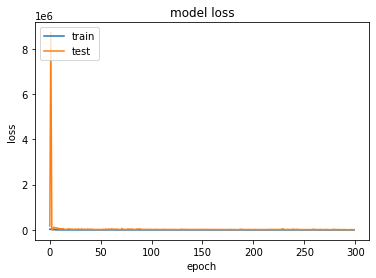

[766.9246]
              Region               Country        5/1/20
0                NaN           Afghanistan   2107.680420
1                NaN               Albania    736.679321
2                NaN               Algeria   3835.565674
3                NaN               Andorra    888.479675
4                NaN                Angola      0.000000
..               ...                   ...           ...
242              NaN               Ukraine  15017.744141
243              NaN  United Arab Emirates  15870.536133
244          Bermuda        United Kingdom    178.692734
245   Cayman Islands        United Kingdom      0.000000
246  Channel Islands        United Kingdom    766.924622

[247 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Gibraltar United Kingdom 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


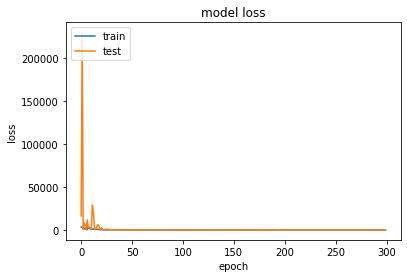

[143.51065]
              Region               Country        5/1/20
0                NaN           Afghanistan   2107.680420
1                NaN               Albania    736.679321
2                NaN               Algeria   3835.565674
3                NaN               Andorra    888.479675
4                NaN                Angola      0.000000
..               ...                   ...           ...
243              NaN  United Arab Emirates  15870.536133
244          Bermuda        United Kingdom    178.692734
245   Cayman Islands        United Kingdom      0.000000
246  Channel Islands        United Kingdom    766.924622
247        Gibraltar        United Kingdom    143.510651

[248 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Isle of Man United Kingdom 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


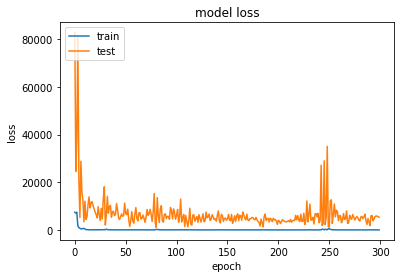

[495.95267]
              Region         Country       5/1/20
0                NaN     Afghanistan  2107.680420
1                NaN         Albania   736.679321
2                NaN         Algeria  3835.565674
3                NaN         Andorra   888.479675
4                NaN          Angola     0.000000
..               ...             ...          ...
244          Bermuda  United Kingdom   178.692734
245   Cayman Islands  United Kingdom     0.000000
246  Channel Islands  United Kingdom   766.924622
247        Gibraltar  United Kingdom   143.510651
248      Isle of Man  United Kingdom   495.952667

[249 rows x 3 columns]
----------------------------------------------------------------------------------------------------
United Kingdom  has  11  values
----------------------------------------------------------------------------------------------------
nan United Kingdom 1 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


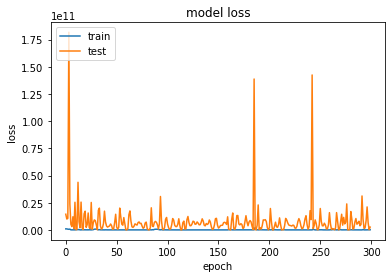



 95%|█████████▌| 176/185 [50:27<06:17, 41.91s/it]

[303340.78]
              Region         Country         5/1/20
0                NaN     Afghanistan    2107.680420
1                NaN         Albania     736.679321
2                NaN         Algeria    3835.565674
3                NaN         Andorra     888.479675
4                NaN          Angola       0.000000
..               ...             ...            ...
246  Channel Islands  United Kingdom     766.924622
247        Gibraltar  United Kingdom     143.510651
248      Isle of Man  United Kingdom     495.952667
249       Montserrat  United Kingdom       0.000000
250              NaN  United Kingdom  303340.781250

[251 rows x 3 columns]
----------------------------------------------------------------------------------------------------
United Kingdom  has  3  values
----------------------------------------------------------------------------------------------------
United Kingdom  has  5  values
----------------------------------------------------------------------------

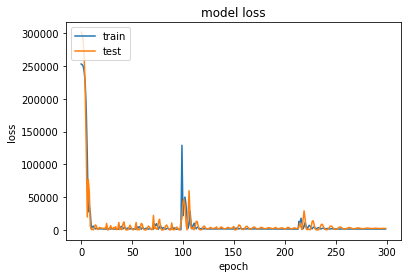



 96%|█████████▌| 177/185 [50:40<04:23, 33.00s/it]

[636.06635]
                          Region         Country       5/1/20
0                            NaN     Afghanistan  2107.680420
1                            NaN         Albania   736.679321
2                            NaN         Algeria  3835.565674
3                            NaN         Andorra   888.479675
4                            NaN          Angola     0.000000
..                           ...             ...          ...
251                     Anguilla  United Kingdom     0.000000
252       British Virgin Islands  United Kingdom     0.000000
253     Turks and Caicos Islands  United Kingdom     0.000000
254  Falkland Islands (Malvinas)  United Kingdom     0.000000
255                          NaN         Uruguay   636.066345

[256 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Uzbekistan 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


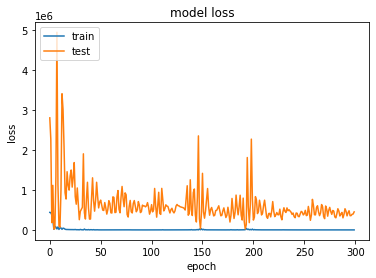



 96%|█████████▌| 178/185 [50:57<03:19, 28.44s/it]

[4003.2664]
                          Region         Country       5/1/20
0                            NaN     Afghanistan  2107.680420
1                            NaN         Albania   736.679321
2                            NaN         Algeria  3835.565674
3                            NaN         Andorra   888.479675
4                            NaN          Angola     0.000000
..                           ...             ...          ...
252       British Virgin Islands  United Kingdom     0.000000
253     Turks and Caicos Islands  United Kingdom     0.000000
254  Falkland Islands (Malvinas)  United Kingdom     0.000000
255                          NaN         Uruguay   636.066345
256                          NaN      Uzbekistan  4003.266357

[257 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Venezuela 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


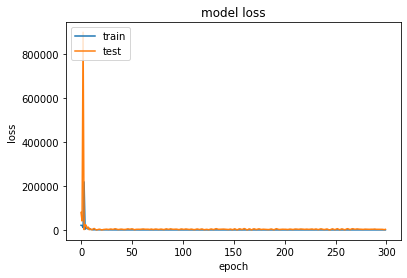



 97%|█████████▋| 179/185 [51:14<02:29, 24.95s/it]

[299.04013]
                          Region         Country       5/1/20
0                            NaN     Afghanistan  2107.680420
1                            NaN         Albania   736.679321
2                            NaN         Algeria  3835.565674
3                            NaN         Andorra   888.479675
4                            NaN          Angola     0.000000
..                           ...             ...          ...
253     Turks and Caicos Islands  United Kingdom     0.000000
254  Falkland Islands (Malvinas)  United Kingdom     0.000000
255                          NaN         Uruguay   636.066345
256                          NaN      Uzbekistan  4003.266357
257                          NaN       Venezuela   299.040131

[258 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan Vietnam 1 1
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


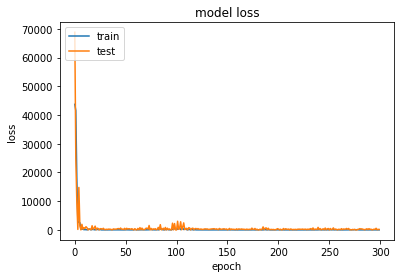



 97%|█████████▋| 180/185 [51:31<01:53, 22.61s/it]

[300.60025]
                          Region         Country       5/1/20
0                            NaN     Afghanistan  2107.680420
1                            NaN         Albania   736.679321
2                            NaN         Algeria  3835.565674
3                            NaN         Andorra   888.479675
4                            NaN          Angola     0.000000
..                           ...             ...          ...
254  Falkland Islands (Malvinas)  United Kingdom     0.000000
255                          NaN         Uruguay   636.066345
256                          NaN      Uzbekistan  4003.266357
257                          NaN       Venezuela   299.040131
258                          NaN         Vietnam   300.600250

[259 rows x 3 columns]
----------------------------------------------------------------------------------------------------
nan West Bank and Gaza 0 0
Loss:  mse 	 Days behind:  8
dict_keys(['val_loss', 'loss'])


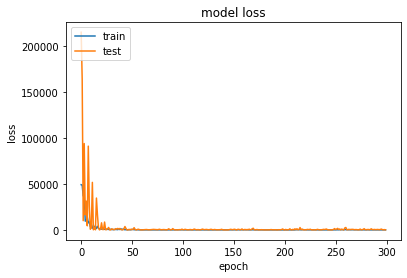



100%|██████████| 185/185 [51:49<00:00, 16.81s/it]

[635.0788]
    Region             Country       5/1/20
0      NaN         Afghanistan  2107.680420
1      NaN             Albania   736.679321
2      NaN             Algeria  3835.565674
3      NaN             Andorra   888.479675
4      NaN              Angola     0.000000
..     ...                 ...          ...
255    NaN             Uruguay   636.066345
256    NaN          Uzbekistan  4003.266357
257    NaN           Venezuela   299.040131
258    NaN             Vietnam   300.600250
259    NaN  West Bank and Gaza   635.078796

[260 rows x 3 columns]
----------------------------------------------------------------------------------------------------
Western Sahara  has  6  values
----------------------------------------------------------------------------------------------------
Yemen  has  1  values
----------------------------------------------------------------------------------------------------
Zambia  has  76  values
---------------------------------------------------------

In [19]:
from tqdm import tqdm

province_preds = {'Region': "", 'Country': "",'5/1/20': [] }
province_preds_df = pd.DataFrame(data=province_preds)
#province_preds_df = pd.read_csv('preds_confirmed.csv')

for country in tqdm(all_countries):
    
    if country == 'Taiwan*':
        country_name = 'Taiwan'
        country_apple = 'Taiwan'
    elif country == 'US':
        country_name = 'United States'
        country_apple = 'United States'
    elif country == 'Korea, South':
        country_name = 'South Korea'
        country_apple = 'Republic of Korea'
    else:
        country_name = country
        country_apple = country
        
    if country_name in countries_t:
        #print(country, "has test data")
        hastest = 1
        tests, start_date, e = get_tests_data(total_test, country_name)
        if start_date < datetime.datetime.strptime('1/22/20', "%m/%d/%y"):
            start_date = datetime.datetime.strptime('1/22/20', "%m/%d/%y")
            tests = tests[1:]
        if tests == [1]:
            #print('Not enough test data')
            hastest = 'NE'
            start_date = datetime.datetime.strptime('3/1/20', "%m/%d/%y")
    else:
        #print("Does not have test data")
        hastest = 0
        start_date = datetime.datetime.strptime('3/1/20', "%m/%d/%y")
        tests = [1]

    end_date = datetime.datetime.strptime('4/23/20', "%m/%d/%y")
    
    if country_apple in countries_a:
            #print('Has Apple')
            hasapple = 1
            drive, walk, end_date_mobility = get_mobility_data(apple_data, country_apple, start_date)
    else:
        #print('No Apple')
        hasapple = 0
        drive, walk = [1], [1]
            
    for province in confirmed[confirmed['Country/Region']==country]['Province/State']:
        data = get_covid_data(confirmed, country, province, start_date)
        # data = get_covid_data(dead, country, start_date)
        # data = get_covid_data(recovered, country, province, start_date)
        if data[-1] < 80:
            print(country, " has ", data[-1], " values")
            new_data = [province, country, 0] 
            province_preds_df.loc[len(province_preds_df)] = new_data
        else:
            # D - deaths
            # C - confirmed
            # R - recovered
            # T - tests
            # V - driving 
            # W - walking
            CTVW = combine_data(data, tests, drive, walk)
            print(province, country, hastest, hasapple)
            pred, model = generate_and_run2(CTVW, 'EncDec', 8, loss_='mse', validation_split_=0.1, epochs=300, v_=0)
            new_data = [province, country, pred[0][0][0]] 
            province_preds_df.loc[len(province_preds_df)] = new_data
            print(province_preds_df)
            #province_preds_df.to_csv('province_preds_recovered.csv', index=False)
            province_preds_df.to_csv('preds_confirmed.csv', index=False)
        print("-"*100)

In [ ]:
province_preds_df.to_csv('preds_confirmed.csv', index=False)